# Kaggle Africa Soil Property Prediction Challenge

## Predict physical and chemical properties of soil using spectral measurements

Advances in rapid, low cost analysis of soil samples using infrared spectroscopy, georeferencing of soil samples, and greater availability of earth remote sensing data provide new opportunities for predicting soil functional properties at unsampled locations. Soil functional properties are those properties related to a soil’s capacity to support essential ecosystem services such as primary productivity, nutrient and water retention, and resistance to soil erosion. Digital mapping of soil functional properties, especially in data sparse regions such as Africa, is important for planning sustainable agricultural intensification and natural resources management.

Diffuse reflectance infrared spectroscopy has shown potential in numerous studies to provide a highly repeatable, rapid and low cost measurement of many soil functional properties. The amount of light absorbed by a soil sample is measured, with minimal sample preparation, at hundreds of specific wavebands across a range of wavelengths to provide an infrared spectrum (Fig. 1). The measurement can be typically performed in about 30 seconds, in contrast to conventional reference tests, which are slow and expensive and use chemicals.

Conventional reference soil tests are calibrated to the infrared spectra on a subset of samples selected to span the diversity in soils in a given target geographical area. The calibration models are then used to predict the soil test values for the whole sample set. The predicted soil test values from georeferenced soil samples can in turn be calibrated to remote sensing covariates, which are recorded for every pixel at a fixed spatial resolution in an area, and the calibration model is then used to predict the soil test values for each pixel. The result is a digital map of the soil properties.

This competition asks you to predict 5 target soil functional properties from diffuse reflectance infrared spectroscopy measurements.

Acknowledgements

This competition is sponsored by the Africa Soil Information Service.

### Evaluation

Submissions are scored on MCRMSE (mean columnwise root mean squared error):

$$MCRMSE = \frac{1}{5} \sum_{j=1}^5 \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_{ij} − ŷ_{ij})^2}$$

where y and ŷ  are the actual and predicted values, respectively.

### Submission File

For each row in the dataset, the submission file should contain an identifier column (PIDN) and 5 prediction columns: Ca, P, pH, SOC, and Sand. PIDN, the sample identifier, should be copied from the first column of test data file. Ca, P, pH, SOC, and Sand are soil properties whose values you must predict.

The file should contain a header and have the following format:

PIDN,Ca,P,pH,SOC,Sand
XNhoFZW5,1.3,3.1,2.0,1.5,4.8

### File descriptions

train.csv - the training set has 1158 rows.
test.csv - the test set has 728 rows.
sample_submission.csv - all zeros prediction, serving as a sample submission file in the correct format.

### Data fields

- __SOC__, __pH__, __Ca__, __P__, __Sand__ are the five target variables for predictions. The data have been monotonously transformed from the original measurements and thus include negative values. 

- __PIDN__: unique soil sample identifier

- __SOC__: Soil organic carbon

- __pH__: pH values

- __Ca__: Mehlich-3 extractable Calcium

- __P__: Mehlich-3 extractable Phosphorus

- __Sand__: Sand content 

- m7497.96 - m599.76: There are 3,578 mid-infrared absorbance measurements. For example, the "m7497.96" column is the absorbance at wavenumber 7497.96 cm-1. We suggest you to remove spectra CO2 bands which are in the region m2379.76 to m2352.76, but you do not have to.

- __Depth__: Depth of the soil sample (2 categories: "Topsoil", "Subsoil")

We have also included some potential spatial predictors from remote sensing data sources. Short variable descriptions are provided below and additional descriptions can be found at AfSIS data: http://www.africasoils.net/data/datasets . The data have been mean centered and scaled.

- __BSA__: average long-term Black Sky Albedo measurements from MODIS satellite images (BSAN = near-infrared, BSAS = shortwave, BSAV = visible)

- __CTI__: compound topographic index calculated from Shuttle Radar Topography Mission elevation data

- __ELEV__: Shuttle Radar Topography Mission elevation data

- __EVI__: average long-term Enhanced Vegetation Index from MODIS satellite images.

- __LST__: average long-term Land Surface Temperatures from MODIS satellite images (LSTD = day time temperature, LSTN = night time temperature)

- __Ref__: average long-term Reflectance measurements from MODIS satellite images (Ref1 = blue, Ref2 = red, Ref3 = near-infrared, Ref7 = mid-infrared)

- __Reli__: topographic Relief calculated from Shuttle Radar Topography mission elevation data

- __TMAP & TMFI__: average long-term Tropical Rainfall Monitoring Mission data (TMAP = mean annual precipitation, TMFI = modified Fournier index)

__BART Example__ : An example model using Bayesian Additive Regression Trees can be found here : http://afsiskaggle.qed.ai/ . 

### FAQ

__Why not more data?__

We will not introduce additional data (e.g. georeference) at this stage of the competition. We think that would be confusing (to us), as we would really like to find out how predictive the spectral methods are/would be when they are applied in new places and/or at different points in time by data science experts such as yourselves. Subsequent Kaggle competitions may focus on explicitly spatial and or space-time predictions.

__Background on data set creation__

There have been a number of questions regarding why and how the data were ordered in the training and test sets. As some of you have surmised there is certainly geographical clustering in this dataset. This is due to the spatially stratified multilevel sampling design that was used to assemble the data. The following is an abbreviated version of how this came about.

When the Africa Soil Information Service (AfSIS) project started in 2009, we were faced with the enormous logistical task of obtaining a representative sample covering ~18.1 million km2 of the non-desert portion of Africa, including Madagascar, that could be used as a baseline for monitoring soil and other ecosystem properties.

The way we chose to go about this was to select 60, 10 × 10 km sized “Sentinel Landscapes”, stratified by the major Koeppen-Geiger climate zones of Africa, excluding the true deserts and some of the African countries which we were not allowed to work in at the time, due to security reasons.

Within each of the 60 Sentinel Landscapes AfSIS field teams sampled 16, 1 km2 “Sampling Clusters” (1 km2 circular areas) with 10, 1000 m2, randomly located circular “Sampling Plots”.

Topsoil (0-20 cm) and subsoil (20-50 cm) samples were subsequently recovered by physically mixing core subsamples from 4 locations within each Sampling Plot. Hence the intent was to obtain a representative multilevel/multistage sample consisting of:

60 Sentinel Landscapes
16 Sampling Clusters per Sentinel Landscape
10 Sampling Plots per Sampling Cluster
2 composite Soil Samples (topsoil & subsoil) per Sampling Plot
Multiply those numbers and you obtain the intended number of composite soil samples (19,200) that were to be collected in the field over a 4-year period between 2009-2012.

To achieve this target, we pre-generated appropriately randomized GPS coordinates for every Sampling Plot and, AfSIS field teams then navigated to (most) of those spots on the map to collect samples (insert n/N Sampling Plots).

As might be expected with an exercise of this magnitude, the actual total number of soil samples in this dataset is somewhat smaller than intended, as some locations were either completely inaccessible by 4WD vehicle and/or on foot or that had soil depth restrictions that prevented the field teams from recovering physical samples.

All physically recovered samples went into our lab (in Nairobi) to be characterized with the MIR spectral measurements that you are currently using. The potential spatial predictors, which cover the entire African continent (and beyond), were derived from NASA remote sensing data missions.

A 10% subsample of all the soils that were measured with the MIR method, subsequently went on to be characterized with more reference measurements.

“Reference measurements” are much more expensive (potentially hundreds of U$ per sample) and time-consuming. The other 90% of samples that were not characterized with “reference” methods have been physically archived, so that we can potentially retrieve those for calibrating new analytical methods and/or validating old methods.

What is posted for this Kaggle is the complete spectral + reference dataset that we have currently, subject to the sampling procedures described above. The training and test data have been split along Sentinel Landscape levels because we are primarily interested in predicting soil properties at new Sentinel Landscapes.


In [1]:
import csv 
import random
import math
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn import cross_validation

import matplotlib.pyplot as plt
%pylab inline

#pd.options.display.mpl_style = 'default'  # for grey backgrounds ggplot style
pd.options.display.mpl_style = None
plt.rcParams['figure.figsize'] = (13,13)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
df_train = pd.read_csv("training.csv")

In [3]:
# Create 5 training sets
df_train_SOC = df_train.copy()
df_train_SOC.drop('pH', axis=1, inplace=True)
df_train_SOC.drop('Ca', axis=1, inplace=True)
df_train_SOC.drop('P', axis=1, inplace=True)
df_train_SOC.drop('Sand', axis=1, inplace=True)

In [4]:
df_train_SOC.to_csv('train_SOC.csv', index=False, mode='wb')

In [5]:
df_train_pH = df_train.copy()
df_train_pH.drop('SOC', axis=1, inplace=True)
df_train_pH.drop('Ca', axis=1, inplace=True)
df_train_pH.drop('P', axis=1, inplace=True)
df_train_pH.drop('Sand', axis=1, inplace=True)

In [6]:
df_train_pH.to_csv('train_pH.csv', index=False, mode='wb')

In [7]:
df_train_Ca = df_train.copy()
df_train_Ca.drop('SOC', axis=1, inplace=True)
df_train_Ca.drop('pH', axis=1, inplace=True)
df_train_Ca.drop('P', axis=1, inplace=True)
df_train_Ca.drop('Sand', axis=1, inplace=True)

In [8]:
df_train_Ca.to_csv('train_Ca.csv', index=False, mode='wb')

In [9]:
df_train_P = df_train.copy()
df_train_P.drop('SOC', axis=1, inplace=True)
df_train_P.drop('pH', axis=1, inplace=True)
df_train_P.drop('Ca', axis=1, inplace=True)
df_train_P.drop('Sand', axis=1, inplace=True)

In [10]:
df_train_P.to_csv('train_P.csv', index=False, mode='wb')

In [11]:
df_train_Sand = df_train.copy()
df_train_Sand.drop('SOC', axis=1, inplace=True)
df_train_Sand.drop('pH', axis=1, inplace=True)
df_train_Sand.drop('Ca', axis=1, inplace=True)
df_train_Sand.drop('P', axis=1, inplace=True)

In [12]:
df_train_Sand.to_csv('train_Sand.csv', index=False, mode='wb')

In [13]:
# spatial_predictors = df_train.columns[3579:3600]
spatial_predictors = ['BSAN','BSAS','BSAV','CTI','ELEV','EVI','LSTD','LSTN',
                      'REF1','REF2','REF3','REF7','RELI','TMAP','TMFI','Depth']
spectra = [m for m in list(df_train.columns) if m[0]=='m']
targets = ['Ca','P','pH','SOC','Sand']
CO2_band = list(df_train.columns[2655:2670])

In [14]:
df_test = pd.read_csv("sorted_test.csv")

## EDA 

In [15]:
summary = df_train[targets].describe()
summary

Ca            P           pH          SOC         Sand
count  1157.000000  1157.000000  1157.000000  1157.000000  1157.000000
mean      0.006442    -0.014524    -0.028543     0.080414    -0.012646
std       1.070541     0.995469     0.920224     1.141989     0.988520
min      -0.535828    -0.418309    -1.886946    -0.857863    -1.493378
25%      -0.451077    -0.345681    -0.717841    -0.615639    -0.899649
50%      -0.348682    -0.269595    -0.175376    -0.349974    -0.134651
75%      -0.042654    -0.089755     0.376442     0.275121     0.786391
max       9.645815    13.266841     3.416117     7.619989     2.251685

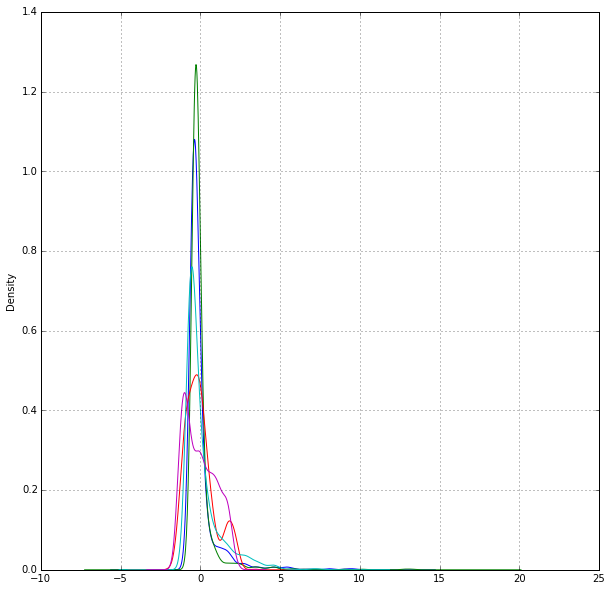

In [16]:
for t in targets:
    df_train[t].plot(figsize=(10,10), kind='kde')

In [17]:
summary.loc['std','Ca']

1.0705411443913293

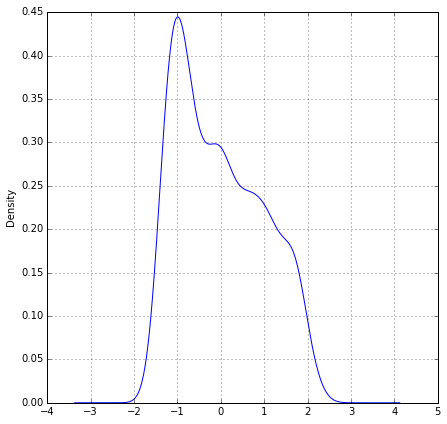

In [18]:
df_train.Sand.plot(figsize=(7,7), kind='kde')

## Functions

In [19]:
def RMSE(y, yhat, span=targets):
    return (sqrt((1.0/len(y)) * (pow((y[span] - yhat[span]), 2).sum())))

In [20]:
#MCRMSE
def MCRMSE(df_act, df_pred): # actual vs predicted
    return ((1.0/5) * (sqrt((1.0/len(df_act)) * (pow((df_act - df_pred), 2).sum())).sum()))

## Benchmarks

In [21]:
df_zeros = pd.DataFrame(index=df_train.PIDN, columns=targets)
df_zeros.fillna(0, inplace=True)
df_zeros[:3]

Ca  P  pH  SOC  Sand
PIDN                          
XNhoFZW5   0  0   0    0     0
9XNspFTd   0  0   0    0     0
WDId41qG   0  0   0    0     0

In [22]:
df_train_ix = df_train.set_index('PIDN')
df_train_ix[:2]

m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
PIDN                                                                   
XNhoFZW5  0.302553  0.301137  0.299748  0.300354  0.302679  0.303799   
9XNspFTd  0.270192  0.268555  0.266964  0.267938  0.271013  0.272346   

          m7486.39  m7484.46  m7482.54  m7480.61    ...         REF7  \
PIDN                                                ...                
XNhoFZW5  0.301702  0.298936  0.298126  0.298120    ...    -0.646673   
9XNspFTd  0.269870  0.266976  0.266544  0.266766    ...    -0.646673   

              RELI      TMAP      TMFI    Depth        Ca         P        pH  \
PIDN                                                                            
XNhoFZW5  1.687734  0.190708  0.056843  Topsoil -0.295749 -0.041336 -1.129366   
9XNspFTd  1.687734  0.190708  0.056843  Subsoil -0.387442 -0.231552 -1.531538   

               SOC      Sand  
PIDN                          
XNhoFZW5  0.353258  1.269748  
9XNspFTd -0.264023  1.692209  

[2 rows x 3599 columns]

In [23]:
row_dict = RMSE(df_train_ix[targets], df_zeros).to_dict()
row_dict['MCRMSE'] = MCRMSE(df_train_ix[targets], df_zeros)
row_dict['Model'] = 'Zeros'
row_dict['Kaggle'] = 1.05359
row_dict

{'Ca': 1.0700977986026503,
 'Kaggle': 1.05359,
 'MCRMSE': 1.0236020460418818,
 'Model': 'Zeros',
 'P': 0.99514494007591237,
 'SOC': 1.1443247379412778,
 'Sand': 0.98817344890261571,
 'pH': 0.92026930468695201}

In [24]:
df_LB = pd.DataFrame( columns=['Model', 'MCRMSE', 'Kaggle'] + targets)
df_LB = df_LB.append(row_dict, ignore_index=True)
df_LB[:1]

Model    MCRMSE   Kaggle        Ca         P        pH       SOC      Sand
0  Zeros  1.023602  1.05359  1.070098  0.995145  0.920269  1.144325  0.988173

In [25]:
df_mean = pd.DataFrame(index=df_train.PIDN, columns=targets)
df_mean['Ca'] = [summary.Ca['mean'] for i in range(len(df_mean))]
df_mean['P'] = [summary.P['mean'] for i in range(len(df_mean))]
df_mean['pH'] = [summary.pH['mean'] for i in range(len(df_mean))]
df_mean['SOC'] = [summary.SOC['mean'] for i in range(len(df_mean))]
df_mean['Sand'] = [summary.Sand['mean'] for i in range(len(df_mean))]
df_mean[:2]

Ca         P        pH       SOC      Sand
PIDN                                                      
XNhoFZW5  0.006442 -0.014524 -0.028543  0.080414 -0.012646
9XNspFTd  0.006442 -0.014524 -0.028543  0.080414 -0.012646

In [26]:
row_dict = RMSE(df_train_ix[targets], df_mean).to_dict()
row_dict['MCRMSE'] = MCRMSE(df_train_ix[targets], df_mean)
row_dict['Model'] = 'Means'
df_LB = df_LB.append(row_dict, ignore_index=True)
df_LB

Model    MCRMSE   Kaggle        Ca         P        pH       SOC      Sand
0  Zeros  1.023602  1.05359  1.070098  0.995145  0.920269  1.144325  0.988173
1  Means  1.022906      NaN  1.070078  0.995039  0.919827  1.141496  0.988093

## SVM

In [27]:
from sklearn import svm
from sklearn import cross_validation

labels = df_train[['Ca','P','pH','SOC','Sand']].values

df_train_data  = df_train.drop(['Ca', 'P', 'pH', 'SOC', 'Sand', 'PIDN'], axis=1)
df_test_data = df_test.drop('PIDN', axis=1)

xtrain = np.array(df_train_data)[:,:3578]
xtest = np.array(df_test_data)[:,:3578]

sup_vec = svm.SVR(C=10000.0, verbose = 2)

preds = np.zeros((xtrain.shape[0], 5))
for i in range(5):
    sup_vec.fit(xtrain, labels[:,i])
    preds[:,i] = sup_vec.predict(xtrain).astype(float)

preds[:3]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([[-0.39579768, -0.07096845, -0.95179227,  0.30235172,  1.19629799],
       [-0.4453165 , -0.24664979, -1.26793439, -0.16449254,  1.04191307],
       [-0.18553081,  0.20042411, -0.24831343,  0.24295871,  0.98854325]])

In [28]:
df_svm_all = pd.DataFrame(preds, columns=targets, index=df_train_ix.index)
df_svm_all[:2]

Ca         P        pH       SOC      Sand
PIDN                                                      
XNhoFZW5 -0.395798 -0.070968 -0.951792  0.302352  1.196298
9XNspFTd -0.445316 -0.246650 -1.267934 -0.164493  1.041913

In [29]:
row_dict = RMSE(df_train_ix[targets], df_svm_all).to_dict()
row_dict['MCRMSE'] = MCRMSE(df_train_ix[targets], df_svm_all)
row_dict['Model'] = 'SVM All'
df_LB = df_LB.append(row_dict, ignore_index=True)
df_LB

Model    MCRMSE   Kaggle        Ca         P        pH       SOC  \
0    Zeros  1.023602  1.05359  1.070098  0.995145  0.920269  1.144325   
1    Means  1.022906      NaN  1.070078  0.995039  0.919827  1.141496   
2  SVM All  0.379462      NaN  0.230535  0.901253  0.263926  0.228648   

       Sand  
0  0.988173  
1  0.988093  
2  0.272947

In [30]:
preds = np.zeros((xtrain.shape[0], 5))
scores = []
for i in range(5):
    scores.append(cross_validation.cross_val_score(sup_vec, xtrain, labels[:,i], 
                                                 cv=5, scoring='mean_squared_error'))
#    sup_vec.fit(xtrain, labels[:,i])
#    preds[:,i] = sup_vec.predict(xtrain).astype(float)

scores

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[array([-0.02344947, -0.41983085, -0.18713392, -0.08484616, -0.04940017]),
 array([-0.26027072, -1.95903599, -1.72834222, -0.76414948, -0.39118941]),
 array([-0.20337913, -0.28909678, -0.23206195, -0.15031983, -0.29038226]),
 array([-0.09570895, -0.75198983, -0.20873291, -0.13793311, -0.19749492]),
 array([-0.75679755, -0.28451474, -0.31573547, -0.11667765, -0.31396493])]

In [32]:
preds = np.zeros((xtrain.shape[0], 5))
scores = []
for i in range(5):
    scores.append(cross_validation.cross_val_score(sup_vec, xtrain, labels[:,i], cv=5))
scores

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[array([ 0.40572301,  0.86305628,  0.88531574, -0.04679444,  0.80755849]),
 array([ 0.12088753, -0.02045901, -0.0085872 , -0.00712799, -1.61356234]),
 array([ 0.55249255,  0.73495289,  0.81362733,  0.65176343,  0.63624032]),
 array([ 0.84089134,  0.69431971,  0.85435028,  0.83024787,  0.76716583]),
 array([ 0.23093928,  0.57713327,  0.71312274,  0.84522472,  0.71744147])]

In [33]:
sample = pd.read_csv('sample_submission.csv')
sample['Ca'] = preds[:,0]
sample['P'] = preds[:,1]
sample['pH'] = preds[:,2]
sample['SOC'] = preds[:,3]
sample['Sand'] = preds[:,4]

sample.to_csv('beating_benchmark.csv', index = False)

ValueError: Length of values does not match length of index

## Merge Predictions

In [21]:
df_pred_Ca = pd.read_csv("pred_Ca.csv")
df_pred_P = pd.read_csv("pred_P.csv")
df_pred_pH = pd.read_csv("pred_pH.csv")
df_pred_SOC = pd.read_csv("pred_SOC.csv")
df_pred_Sand = pd.read_csv("pred_Sand.csv")

In [22]:
df_pred = pd.concat([df_test['PIDN'], 
                     df_pred_Ca['Prediction'], 
                     df_pred_P['Prediction'], 
                     df_pred_pH['Prediction'], 
                     df_pred_SOC['Prediction'], 
                     df_pred_Sand['Prediction']], axis=1)
df_pred.columns = ['PIDN','Ca','P','pH','SOC','Sand']
df_pred[:2]

PIDN        Ca         P        pH       SOC      Sand
0  09gt9UK5 -0.524135 -0.225450 -1.263308 -0.706857  1.554799
1  0BVvxJ6a  0.553459  0.198364  0.720322  0.337059 -1.444849

In [40]:
df_pred.to_csv('kaggle_pred_1.csv', index=False, mode='wb')

In [47]:
df_pred_pH_table = df_pred.copy()
df_pred_pH_table.Ca = 0
df_pred_pH_table.P = 0
df_pred_pH_table.SOC = 0
df_pred_pH_table.Sand = 0
df_pred_pH_table[:2]

PIDN  Ca  P        pH  SOC  Sand
0  09gt9UK5   0  0 -1.263308    0     0
1  0BVvxJ6a   0  0  0.720322    0     0

In [48]:
df_pred_pH_table.to_csv('kaggle_pred_pHonly.csv',index=False, mode='wb')

## Create Test Data 2

In [104]:
df_test2 = df_test.copy()
df_test2['Ca'] = df_pred_Ca['Prediction']
df_test2['P2'] = df_pred_P['Prediction']
df_test2['pH'] = df_pred_P['Prediction']
df_test2['SOC'] = df_pred_SOC['Prediction']
df_test2['Sand'] = df_pred_Sand['Prediction']
df_test2['P'] = [0 for i in df_test2.index]
df_test2[targets+['P2']][:5]

Ca  P        pH       SOC      Sand        P2
0 -0.524135  0 -0.225450 -0.706857  1.554799 -0.225450
1  0.553459  0  0.198364  0.337059 -1.444849  0.198364
2 -0.144741  0 -0.059200  0.248705 -0.714841 -0.059200
3 -0.353643  0  0.039844  0.356097 -0.901129  0.039844
4 -0.423282  0 -0.323299  0.205387 -0.559961 -0.323299

[5 rows x 6 columns]

In [105]:
df_test2.to_csv('test_P2.csv', index=False, mode='wb')

In [30]:
df_test_new = df_test.copy()
df_test_new['Ca'] = df_test_wave_pred_Ca.Prediction
df_test_new['logP'] =  df_test_wave_pred_P.Prediction
df_test_new['oldP'] = df_test_wave_pred_P.Prediction
df_test_new['pH'] = df_test_wave_pred_pH.Prediction
df_test_new['SOC'] = df_test_wave_pred_SOC.Prediction
df_test_new['Sand'] = df_test_wave_pred_Sand.Prediction
df_test_new['pH_high'] = 0
df_test_new.ix[df_test_wave_pred_pH[df_test_wave_pred_pH['Prediction'] > 0].index, 'pH_high'] = 1
df_test_new.ix[df_test_wave_pred_pH[df_test_wave_pred_pH['Prediction'] > 1].index, 'pH_high'] = 2
df_test_new.ix[df_test_wave_pred_pH[df_test_wave_pred_pH['Prediction'] > 2].index, 'pH_high'] = 3
df_test_new.ix[df_test_wave_pred_pH[df_test_wave_pred_pH['Prediction'] > 5.5].index, 'pH_high'] = 4
derived_features = ['BSAN_TMFI','CTI_ELEV','DepthInt']
derived_features += ['Ca', 'oldP', 'pH', 'SOC', 'pH_high']
df_test_new['BSAN_TMFI'] = df_test['BSAN'].map(str) + df_test['TMFI'].map(str)
df_test_new['CTI_ELEV'] = df_test['CTI'].map(str) + df_test['ELEV'].map(str)
df_test_new['DepthInt'] = 0
df_test_new.ix[df_test[df_test['Depth'] == "Topsoil"].index, 'DepthInt'] = 1

In [34]:
df_test_new = df_test_new[['PIDN','logP'] + spatial_predictors + derived_features + list(spectal_diffs)]

In [35]:
df_test_new.to_csv('test_new_logP.csv', index=False)

## Calc Train MCRMSE

$$MCRMSE = \frac{1}{5} \sum_{j=1}^5 \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_{ij} − ŷ_{ij})^2}$$

In [95]:
df_train_pred_Ca = pd.read_csv("train_pred_Ca.csv")
df_train_pred_P = pd.read_csv("train_pred_P.csv")
df_train_pred_pH = pd.read_csv("train_pred_pH.csv")
df_train_pred_SOC = pd.read_csv("train_pred_SOC.csv")
df_train_pred_Sand = pd.read_csv("train_pred_Sand.csv")

In [96]:
df_train_pred = pd.concat([df_train['PIDN'], df_train_pred_Ca['Cross-Validation Prediction'], 
                         df_train_pred_P['Cross-Validation Prediction'], df_train_pred_pH['Cross-Validation Prediction'], 
                         df_train_pred_SOC['Cross-Validation Prediction'], df_train_pred_Sand['Cross-Validation Prediction']], 
                          axis=1)
df_train_pred.columns = ['PIDN','Ca','P','pH','SOC','Sand']
df_train_pred[:2]

PIDN        Ca         P        pH       SOC      Sand
0  XNhoFZW5 -0.391179  0.273549 -1.017078  0.110277  1.308001
1  9XNspFTd -0.339177  0.041938 -1.059134 -0.162545  1.096116

[2 rows x 6 columns]

In [97]:
df_train_act = df_train[['PIDN'] + targets]
df_train_act[:2]

PIDN        Ca         P        pH       SOC      Sand
0  XNhoFZW5 -0.295749 -0.041336 -1.129366  0.353258  1.269748
1  9XNspFTd -0.387442 -0.231552 -1.531538 -0.264023  1.692209

[2 rows x 6 columns]

In [126]:
#MCRMSE
(1.0/5) * (sqrt((1.0/len(df_train_act.index)) * (pow((df_train_act[targets] - df_train_pred[targets]), 2).sum())).sum())

0.40851096790998587

In [125]:
#RMSE
sqrt((1.0/len(df_train_act.index)) * (pow((df_train_act[targets] - df_train_pred[targets]), 2).sum()))

Ca      0.283994
P       0.804387
pH      0.320746
SOC     0.336353
Sand    0.297075
dtype: float64

- First Cut:
- Ca      0.283994
- P       0.875703
- pH      0.320746
- SOC     0.336353
- Sand    0.297075
---------
- Second Cut:
- Ca      0.283994
- P       0.804387
- pH      0.320746
- SOC     0.336353
- Sand    0.297075
---------
- All Wave
- Ca      0.308088
- P       0.804387
- pH      0.306364
- SOC     0.335149
- Sand    0.297976
- MCRMSE  0.41039282752858475
- LB      0.42996

In [186]:
df_train_wave_pred_Ca = pd.read_csv("Africa_Wave_Ca_Advanced_AVG_Blender_(50+51+52+55+59+60+64+65)_100_Top150.csv")
df_train_wave_pred_P = pd.read_csv("Africa_wave_logP_AVG_Blender_(108+109+110)_100_Top150.csv")
df_train_wave_pred_pH = pd.read_csv("Africa_Wave_pH_GLM_Blender_(61+64+65)_100_Top150.csv")
df_train_wave_pred_SOC = pd.read_csv("Africa_Wave_SOC_AVG_Blender_(5+18+19+94+96+97)_100_Top150.csv")
df_train_wave_pred_Sand = pd.read_csv("Africa_Wave_Sand_GLM_Blender_(14+18+19+165+175+177)_100_Univariate_Selections.csv")

In [187]:
df_train_wave_pred = pd.concat([df_train['PIDN'], 
                                df_train_wave_pred_Ca['Cross-Validation Prediction'], 
                                df_train_wave_pred_P['Cross-Validation Prediction'], 
                                df_train_wave_pred_pH['Cross-Validation Prediction'], 
                                df_train_wave_pred_SOC['Cross-Validation Prediction'], 
                                df_train_wave_pred_Sand['Cross-Validation Prediction']], 
                          axis=1)
df_train_wave_pred.columns = ['PIDN','Ca','P','pH','SOC','Sand']
df_train_wave_pred['P'] = list(exp(df_train_wave_pred_P['Cross-Validation Prediction'])-1)

In [189]:
MCRMSE(df_train[targets], df_train_wave_pred[targets])

0.41039282752858475

In [190]:
RMSE(df_train, df_train_wave_pred, targets)

Ca      0.308088
P       0.804387
pH      0.306364
SOC     0.335149
Sand    0.297976
dtype: float64

In [24]:
df_test_wave_pred_Sand = pd.read_csv("Africa_Wave_Sand_GLM_Blender_(14+18+19+165+175+177)_100_Univariate_Selections_test_wave.csv.csv")
df_test_wave_pred_SOC = pd.read_csv("Africa_Wave_SOC_AVG_Blender_(5+18+19+94+96+97)_100_Top150_test_wave.csv.csv")
df_test_wave_pred_Ca = pd.read_csv("Africa_Wave_Ca_Advanced_AVG_Blender_(50+51+52+55+59+60+64+65)_100_Top150_test_wave.csv.csv")
df_test_wave_pred_pH = pd.read_csv("Africa_Wave_pH_GLM_Blender_(61+64+65)_100_Top150_test_wave.csv.csv")
df_test_wave_pred_P = pd.read_csv("Africa_wave_logP_AVG_Blender_(108+109+110)_100_Top150_test_wave.csv.csv")

In [27]:
df_test_wave_pred = pd.concat([df_test['PIDN'], 
                               df_test_wave_pred_Ca['Prediction'], 
                               df_test_wave_pred_P['Prediction'], 
                               df_test_wave_pred_pH['Prediction'], 
                               df_test_wave_pred_SOC['Prediction'], 
                               df_test_wave_pred_Sand['Prediction']], axis=1)
df_test_wave_pred.columns = ['PIDN','Ca','P','pH','SOC','Sand']
df_test_wave_pred['P'] = list(exp(df_test_wave_pred_P['Prediction'])-1)
df_test_wave_pred[:2]

PIDN        Ca         P       pH       SOC      Sand
0  09gt9UK5 -0.442917 -0.203715 -1.29367 -0.597985  1.604762
1  0BVvxJ6a  0.663925 -0.241690  0.51313  0.173113 -1.258975

In [192]:
df_test_wave_pred.to_csv('kaggle_wave_pred.csv', index=False, mode='wb')

In [55]:
df_best_pH = pd.DataFrame(index=df_test.PIDN, columns=targets).fillna(0)
df_best_pH.pH = list(df_test_wave_pred_pH['Prediction'])
df_best_pH[:2]

Ca  P       pH  SOC  Sand
PIDN                               
09gt9UK5   0  0 -1.29367    0     0
0BVvxJ6a   0  0  0.51313    0     0

In [56]:
df_best_pH.to_csv('kaggle_best_pH.csv', mode='wb')

In [39]:
df_best_SOC = pd.DataFrame(index=df_test.PIDN, columns=targets).fillna(0)
df_best_SOC.SOC = list(exp(df_test_wave_pred_SOC['Prediction'])-1)
df_best_SOC[:2]

Ca  P  pH       SOC  Sand
PIDN                               
09gt9UK5   0  0   0 -0.450082     0
0BVvxJ6a   0  0   0  0.189000     0

In [41]:
df_best_SOC.to_csv('kaggle_best_SOC.csv', mode='wb')

In [194]:
df_test_comb = df_test_wave_pred.copy()
df_test_comb['Ca'] = df_pred_Ca['Prediction']
df_test_comb['Sand'] = df_pred_Sand['Prediction']

In [195]:
df_test_comb.to_csv('kaggle_wave_comb.csv', index=False, mode='wb')

## LB 0.43721

## Re-predict P

In [90]:
df_train_P2 = df_train_P.copy()
df_train_P2['Ca'] = df_train_pred.Ca
df_train_P2['P2'] = df_train_pred.P
df_train_P2['pH'] = df_train_pred.pH
df_train_P2['SOC'] = df_train_pred.SOC
df_train_P2['Sand'] = df_train_pred.Sand
df_train_P2[targets+['P2']][:2]

Ca         P        pH       SOC      Sand        P2
0 -0.391179 -0.041336 -1.017078  0.110277  1.308001  0.273549
1 -0.339177 -0.231552 -1.059134 -0.162545  1.096116  0.041938

[2 rows x 6 columns]

In [91]:
df_train_P2.to_csv('train_P2.csv', index=False, mode='wb')

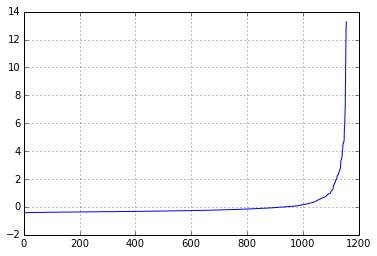

In [93]:
df_train.P.order().plot(use_index=False)

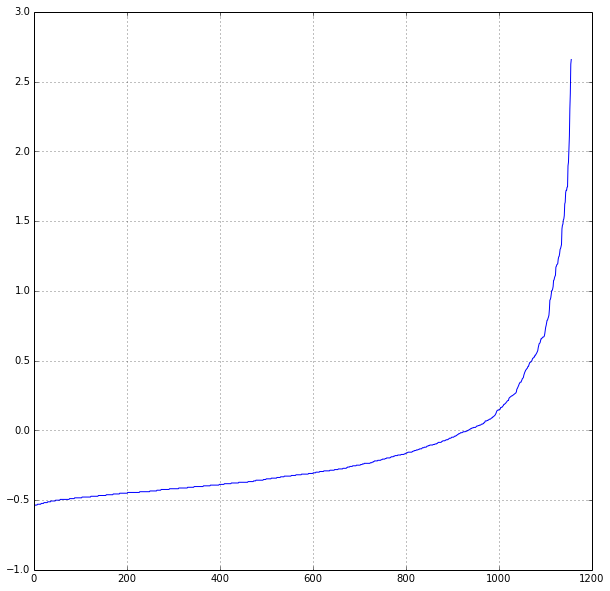

In [324]:
log(df_train.P+1).order().plot(use_index=False)

In [97]:
df_train_P3 = df_train_P.copy()
df_train_P3['Ca'] = df_train_pred.Ca
df_train_P3['P'] = log(df_train_pred.P)
df_train_P3['pH'] = df_train_pred.pH
df_train_P3['SOC'] = df_train_pred.SOC
df_train_P3['Sand'] = df_train_pred.Sand
df_train_P3[targets][:2]

Ca         P        pH       SOC      Sand
0 -0.391179 -1.296273 -1.017078  0.110277  1.308001
1 -0.339177 -3.171569 -1.059134 -0.162545  1.096116

[2 rows x 5 columns]

In [98]:
df_train_P3.to_csv('train_P3.csv', index=False, mode='wb')

## Pred P2

In [108]:
df_pred_P2 = df_pred.copy()
df_pred_P2_P = pd.read_csv("pred_P2.csv")
df_pred_P2['P'] = df_pred_P2_P['Prediction']
df_pred_P2[targets][:2]

Ca        P        pH       SOC      Sand
0 -0.524135 -0.19736 -1.263308 -0.706857  1.554799
1  0.553459 -0.10235  0.720322  0.337059 -1.444849

[2 rows x 5 columns]

In [109]:
df_pred_P2.to_csv('kaggle_pred_P2.csv', index=False, mode='wb')

## Plot MIR data

In [68]:
bands = df_train.columns[1:3578]

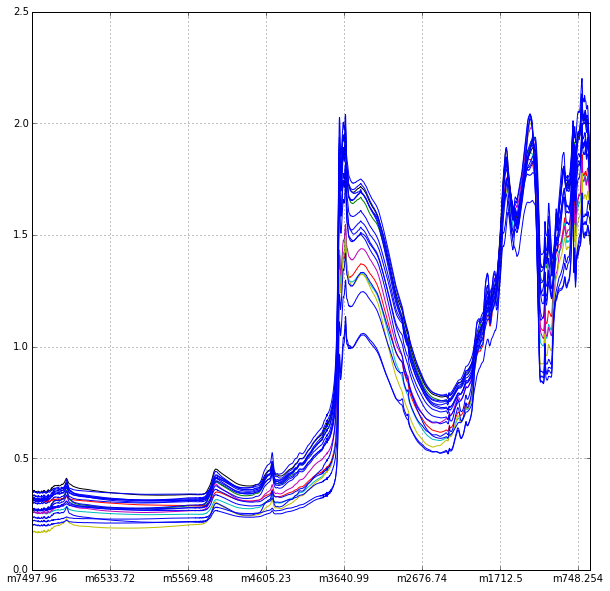

In [201]:
df_train[bands][0:20].transpose().plot(legend=False, figsize=(10,10))

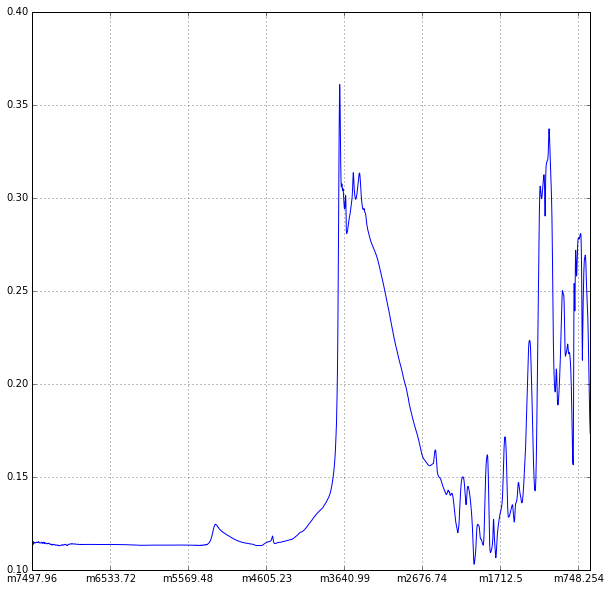

In [160]:
df_train[bands].std().transpose().plot(legend=False, figsize=(10,10))

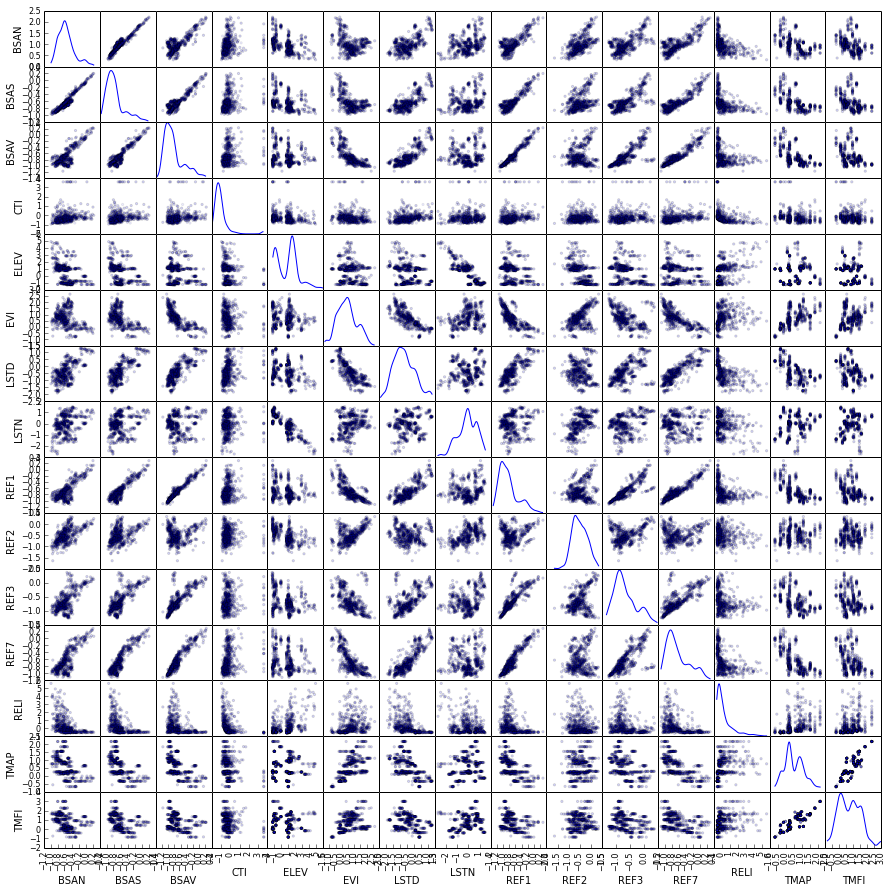

In [199]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_train[spatial_predictors], alpha=0.08, figsize=(15,15), diagonal='kde');

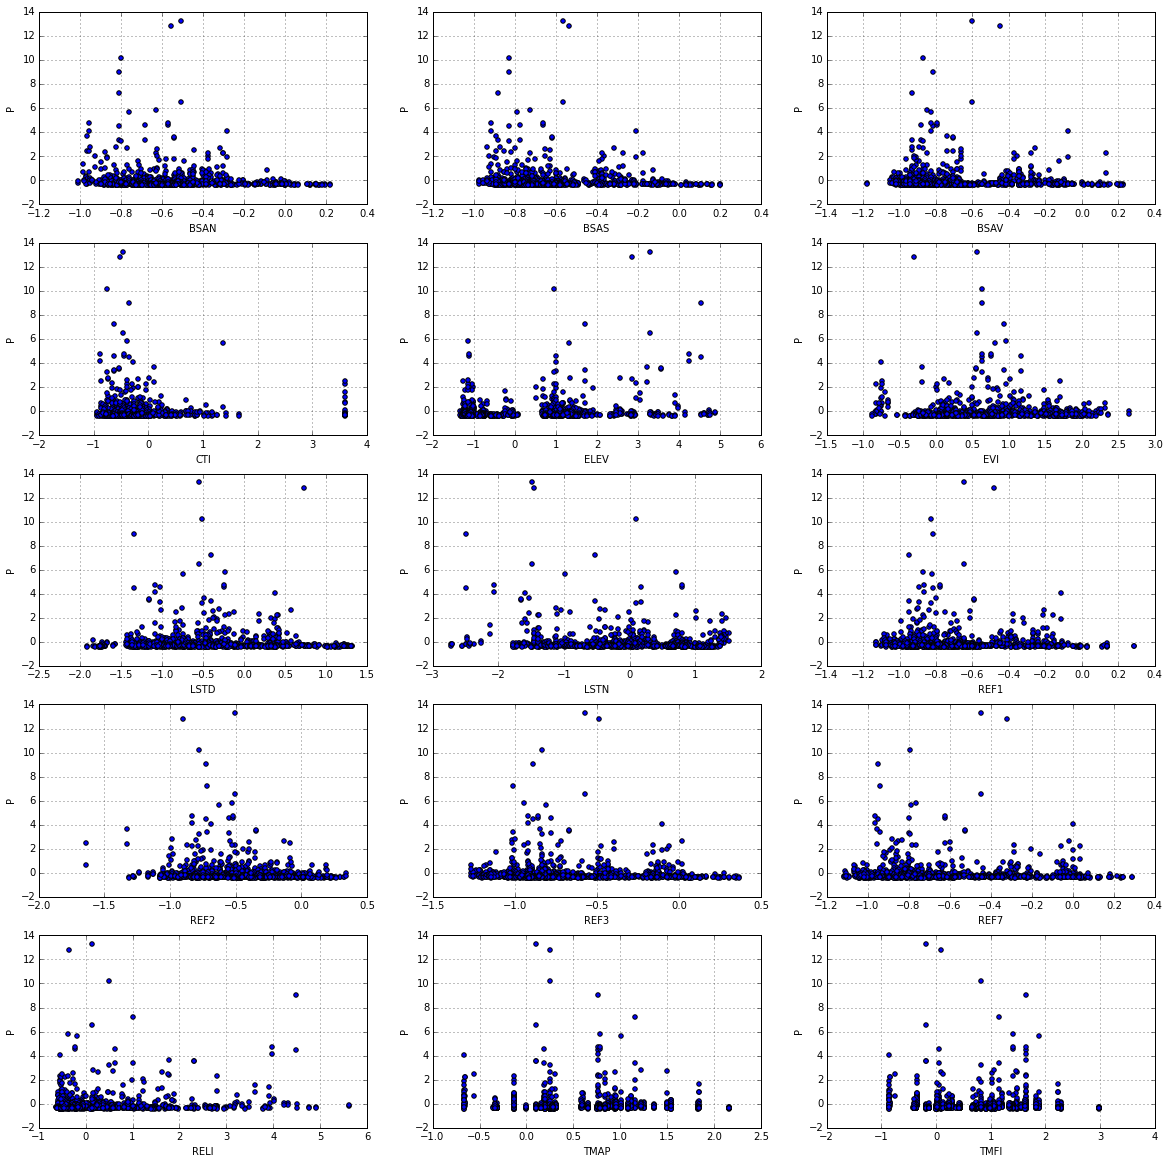

In [196]:
fig, axes = plt.subplots(nrows=5, ncols=3)
row_i = 0
for s in spatial_predictors[:len(spatial_predictors) - 1]:  # don't do depth
    df_train.plot(x=s, y='P', kind='scatter', figsize=(20,20), ax=axes[row_i / 3, row_i % 3])
    row_i += 1

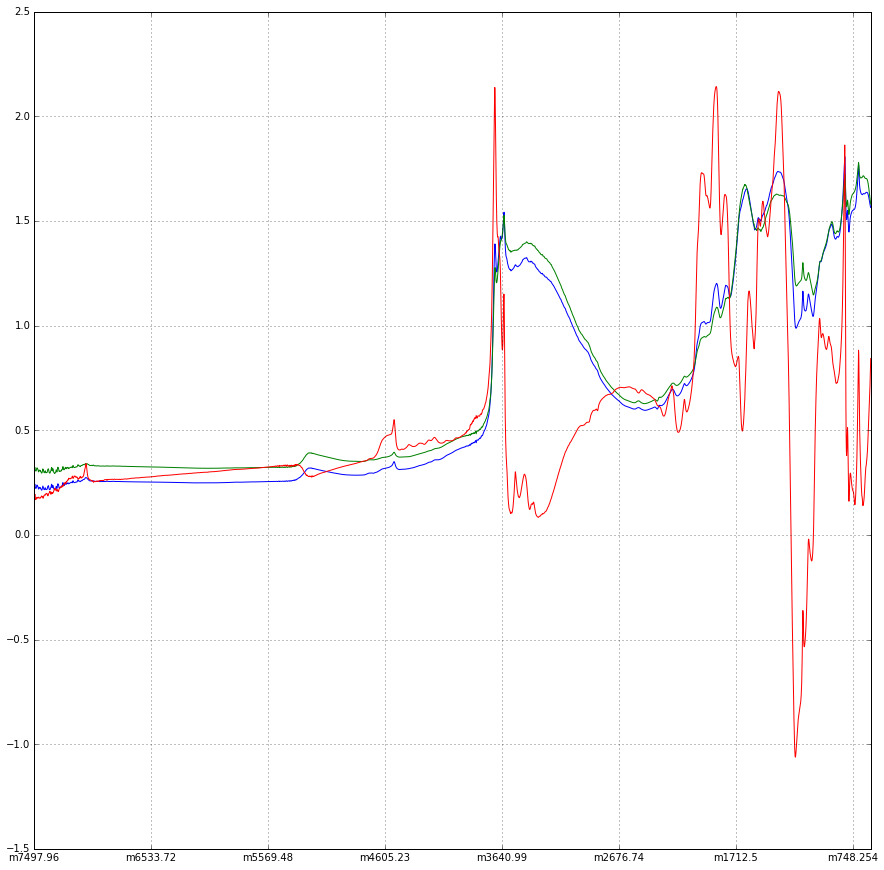

In [32]:
plt.rcParams['figure.figsize'] = (15,15)
df_mean_diff = ((df_train[df_train['P'] < 0][spectra].mean() -  df_train[df_train['P'] > 1][spectra].mean()) * 10) + 1
df_train[df_train['P'] < 0][spectra].mean().plot()
#df_train[df_train['P'] < 0][spectra].mean().plot()
#df_train[df_train['P'] > 0].ix[df_train['P'] < 1][spectra].mean().plot()
df_train[df_train['P'] > 1][spectra].mean().plot()
df_mean_diff.plot()

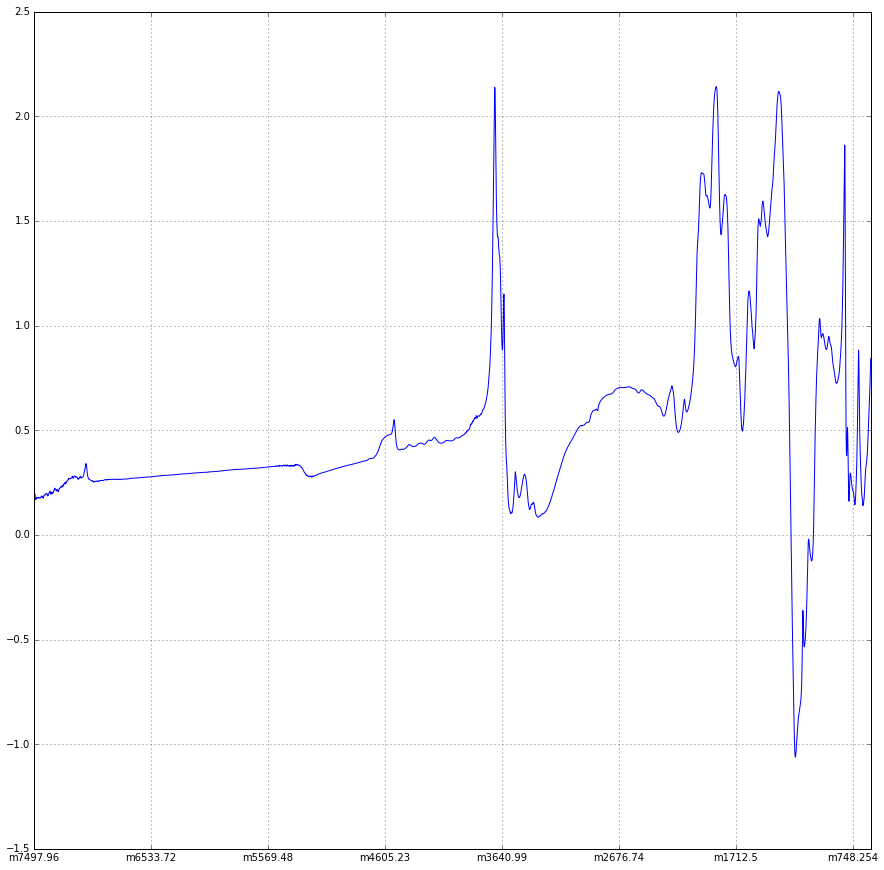

In [306]:
plt.rcParams['figure.figsize'] = (15,15)
#df_mean_diff = df_train[df_train['P'] < 0][spectra].mean() -  df_train[df_train['P'] > 1][spectra].mean()
df_mean_diff.plot()

In [317]:
len(df_mean_diff[df_mean_diff > 1.77].index)

85

In [316]:
len(df_mean_diff[df_mean_diff < -0.9].index)

16

In [328]:
df_train[:4]

PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
0  XNhoFZW5  0.302553  0.301137  0.299748  0.300354  0.302679  0.303799   
1  9XNspFTd  0.270192  0.268555  0.266964  0.267938  0.271013  0.272346   
2  WDId41qG  0.317433  0.316265  0.314948  0.315224  0.316942  0.317764   
3  JrrJf1mN  0.261116  0.259767  0.258384  0.259001  0.261310  0.262417   

   m7486.39  m7484.46  m7482.54    ...         RELI      TMAP      TMFI  \
0  0.301702  0.298936  0.298126    ...     1.687734  0.190708  0.056843   
1  0.269870  0.266976  0.266544    ...     1.687734  0.190708  0.056843   
2  0.316067  0.313874  0.313301    ...     1.806660  0.190708  0.056843   
3  0.260534  0.258039  0.257246    ...     1.806660  0.190708  0.056843   

     Depth        Ca         P        pH       SOC      Sand  DepthInt  
0  Topsoil -0.295749 -0.041336 -1.129366  0.353258  1.269748         1  
1  Subsoil -0.387442 -0.231552 -1.531538 -0.264023  1.692209         0  
2  Topsoil -0.248601 -0.224635 -0.259551  0.064152  2.091835         1  
3  Subsoil -0.332195 -0.318014 -0.577548 -0.318719  2.118477         0  

[4 rows x 3601 columns]

In [361]:
df_train_new = df_train.copy()
df_train_new['Ca'] = df_pred_Ca.Prediction
df_train_new['logP'] =  log(df_train.P+1)
df_train_new['oldP'] = log(df_pred_P.Prediction+1)
df_train_new['pH'] = df_pred_pH.Prediction
df_train_new['SOC'] = df_pred_SOC.Prediction
df_train_new['Sand'] = df_pred_Sand.Prediction
df_train_new['pH_high'] = 0
df_train_new.ix[df_pred_pH[df_pred_pH['Prediction'] > 0].index, 'pH_high'] = 1
df_train_new.ix[df_pred_pH[df_pred_pH['Prediction'] > 1].index, 'pH_high'] = 2
df_train_new.ix[df_pred_pH[df_pred_pH['Prediction'] > 2].index, 'pH_high'] = 3
df_train_new.ix[df_pred_pH[df_pred_pH['Prediction'] > 5.5].index, 'pH_high'] = 4
derived_features = ['BSAN_TMFI','CTI_ELEV','DepthInt']
derived_features += ['Ca', 'oldP', 'pH', 'SOC', 'pH_high']

In [362]:
# GET LOCATIONS
#
# http://www.kaggle.com/c/afsis-soil-properties/forums/t/10167/ordering-of-training-testing-data
#BSAN to TMFI {python: '_'.join(row[3579:3594])}
#CTI & ELEV
#Binary top/bottom soil
df_train_new['BSAN_TMFI'] = df_train['BSAN'].map(str) + df_train['TMFI'].map(str)
df_train_new['CTI_ELEV'] = df_train['CTI'].map(str) + df_train['ELEV'].map(str)
df_train_new['DepthInt'] = 0
df_train_new.ix[df_train[df_train['Depth'] == "Topsoil"].index, 'DepthInt'] = 1

In [33]:
spectal_diffs = df_mean_diff[df_mean_diff > 1.77].index + df_mean_diff[df_mean_diff < -0.9].index
#df_train_new = df_train_new
df_train_new = df_train_new[['PIDN','logP'] + spatial_predictors + derived_features + list(spectal_diffs)]

NameError: name 'df_train_new' is not defined

In [364]:
df_train_new.to_csv('train_new_logP.csv', index=False, mode='wb')

In [230]:
#plt.rcParams['figure.figsize'] = (10,10)
#colls = list(range(len(df_train[spectra].columns)))
#plt.plot(df_train[spectra].columns, list(df_train.ix[df_train[df_train['P'] < 0].index, spectra].mean()), 'b-',
#         df_train[spectra].columns, list(df_train.ix[df_train[df_train['P'] > 2].index, spectra].mean()), 'r-')

## Remove CO2

Remove spectra CO2 bands which are in the region m2379.76 to m2352.76

In [11]:
CO2_band = list(df_train.columns[2655:2670])
print(CO2_band)

['m2379.76', 'm2377.83', 'm2375.9', 'm2373.97', 'm2372.04', 'm2370.11', 'm2368.18', 'm2366.26', 'm2364.33', 'm2362.4', 'm2360.47', 'm2358.54', 'm2356.61', 'm2354.68', 'm2352.76']


In [12]:
# bands[2654:2669] is CO2
# concatenating lists to preserve order
#
l_bands_noCO2 = list(bands[:2653]) + list(bands[2670:])

In [13]:
df_train_noCO22 = pd.concat([df_train[:2654], df_train[2671:]], axis=1)
df_train_noCO22[:3]

PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
0  XNhoFZW5  0.302553  0.301137  0.299748  0.300354  0.302679  0.303799   
1  9XNspFTd  0.270192  0.268555  0.266964  0.267938  0.271013  0.272346   
2  WDId41qG  0.317433  0.316265  0.314948  0.315224  0.316942  0.317764   

   m7486.39  m7484.46  m7482.54  m7480.61  m7478.68  m7476.75  m7474.82  \
0  0.301702  0.298936  0.298126  0.298120  0.298163  0.299124  0.300828   
1  0.269870  0.266976  0.266544  0.266766  0.266464  0.266817  0.268150   
2  0.316067  0.313874  0.313301  0.313296  0.313051  0.313306  0.314301   

   m7472.89  m7470.97  m7469.04  m7467.11  m7465.18  m7463.25      
0  0.302522  0.303633  0.303364  0.302018  0.301226  0.300803 ...  
1  0.269933  0.271409  0.271396  0.270126  0.269351  0.268984 ...  
2  0.315640  0.316764  0.316759  0.315631  0.314860  0.314275 ...  

[3 rows x 7200 columns]

## Pearson Correlation

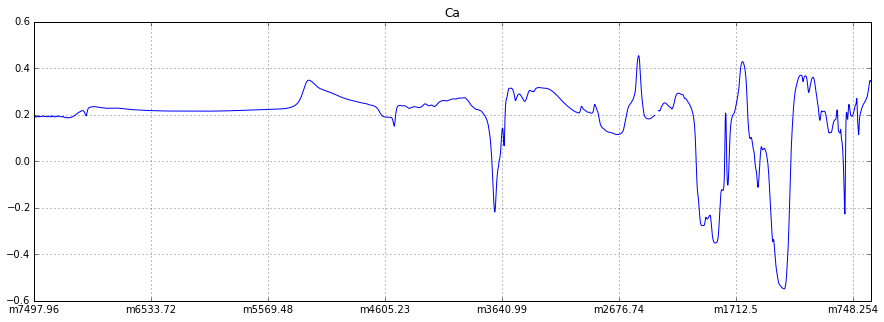

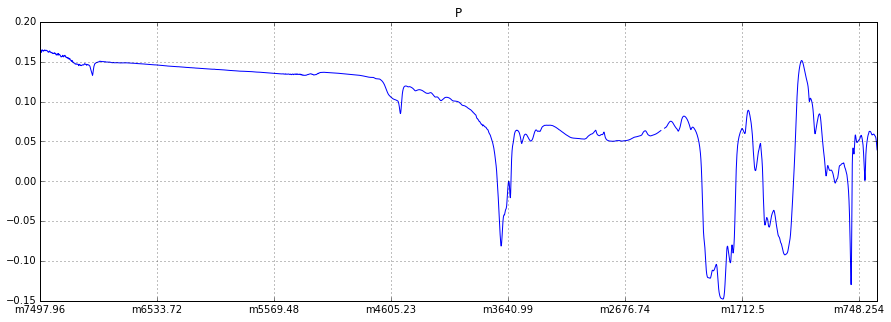

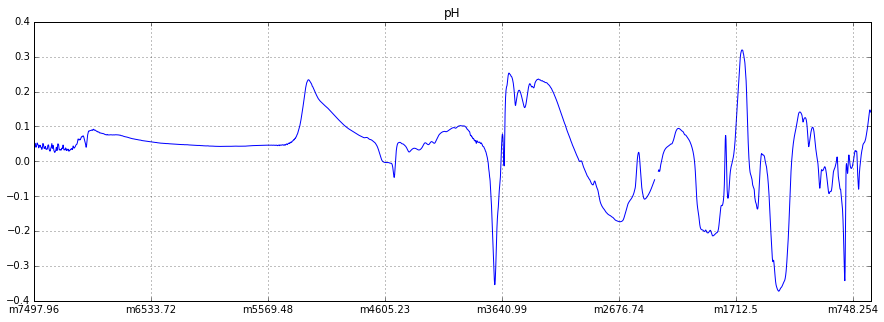

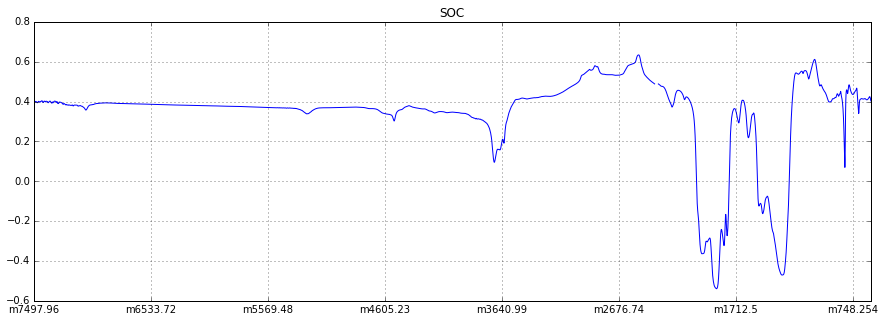

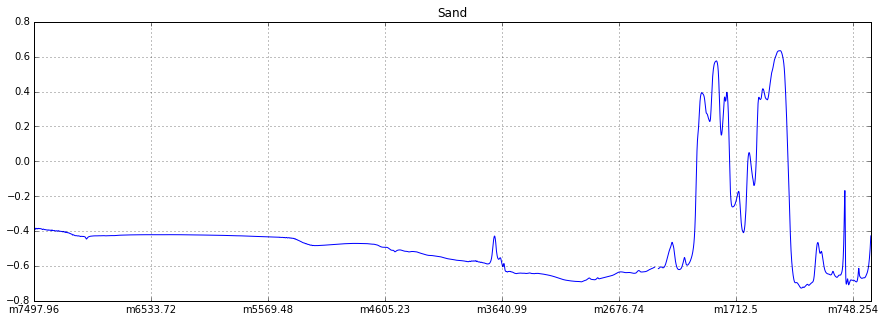

In [234]:
from scipy.stats.stats import pearsonr
plt.rcParams['figure.figsize'] = (15,5)
spectra = [m for m in list(df_train.columns) if m[0]=='m']

co2_cols = ['m2379.76', 'm2377.83', 'm2375.9', 'm2373.97','m2372.04', 'm2370.11', 'm2368.18', 'm2366.26',
            'm2364.33', 'm2362.4', 'm2360.47', 'm2358.54', 'm2356.61', 'm2354.68', 'm2352.76']

corr_spectra = pd.DataFrame(data=None, index=spectra)

for t in targets:

 corr_spectra[t] = 0.
 for m in spectra:
  corr_spectra[t].ix[m] = pearsonr(df_train[m], df_train[t])[0]

 # blank out the CO2 bands
 corr_spectra[corr_spectra.index.isin(co2_cols)] = np.nan
 corr_spectra[t].plot(title=t)
 # plt.savefig('{}.png'.format(t))
 plt.show()
        
plt.rcParams['figure.figsize'] = (15,15)  #reset 

### CS 

In [183]:
df_train.Depth.unique()

array(['Topsoil', 'Subsoil'], dtype=object)

In [185]:
df_train_top = df_train[df_train['Depth'] == 'Topsoil']
df_train_sub = df_train[df_train['Depth'] == 'Subsoil']

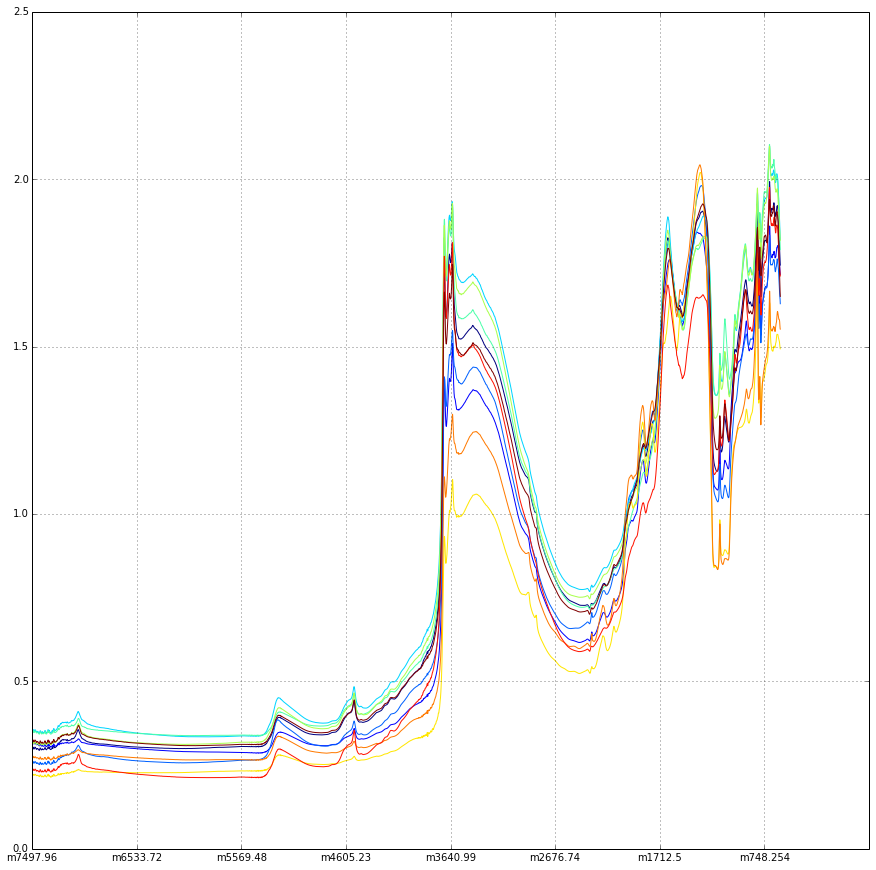

In [218]:
df_train_top[bands][0:10].transpose().plot(legend=False, figsize=(15,15), colormap='jet')

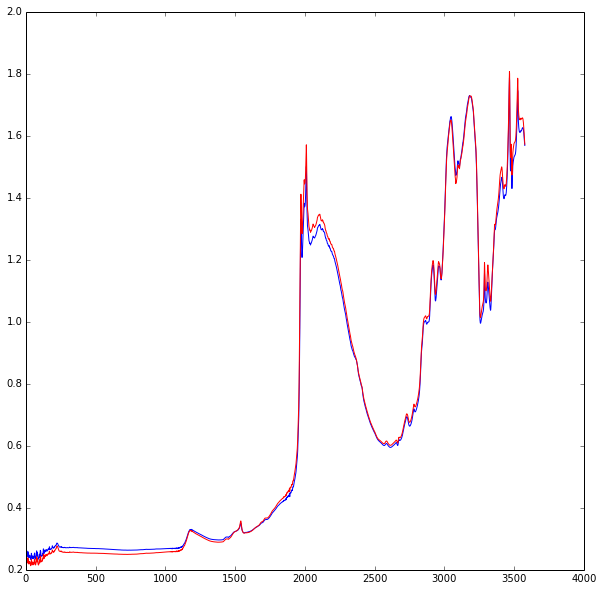

In [215]:
plt.rcParams['figure.figsize'] = 10,10
plt.plot(list(range(len(df_train_top[bands].columns))), list(df_train_top[bands].mean()), 'b-',
         list(range(len(df_train_sub[bands].columns))), list(df_train_sub[bands].mean()), 'r-')

- remove CO2
- smoothing with first deriv
- plot bands as a function of ace value


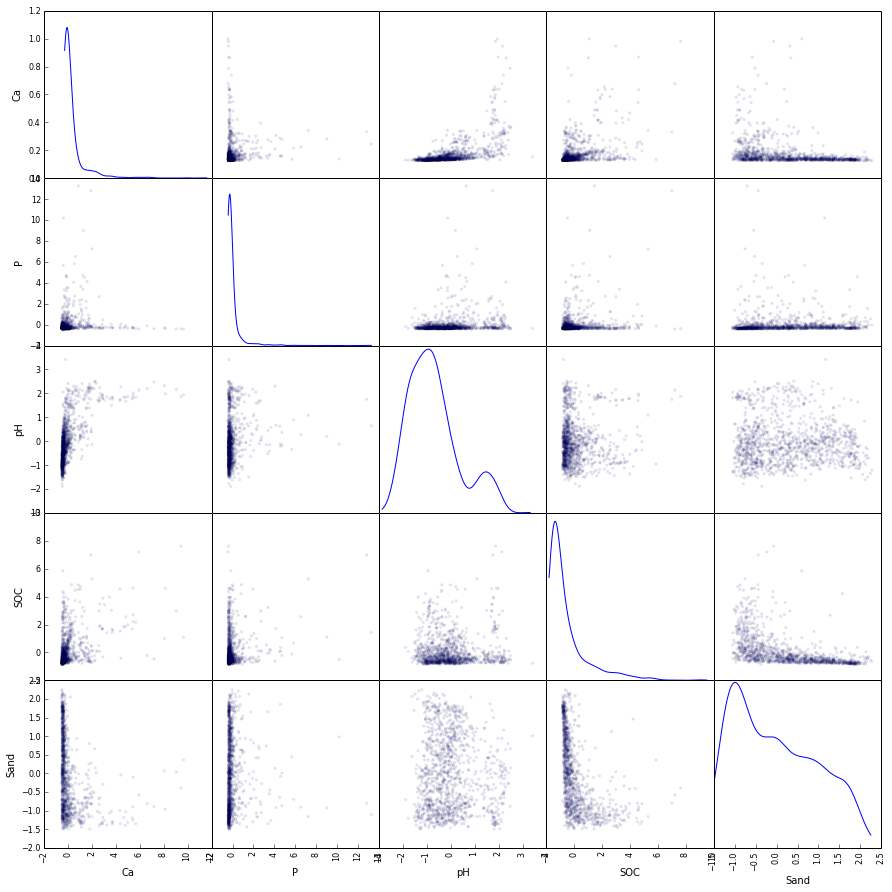

In [197]:
pd.scatter_matrix(df_train[targets], alpha=0.08, figsize=(15,15), diagonal='kde');

In [260]:
df_regit = pd.concat([df_train['P'], df_train['Sand']], axis=1)
import seaborn as sns
sns.regplot("Sand", "P", df_regit);

ImportError: No module named seaborn

In [271]:
mod.HC1_se

Sand    0.028357
dtype: float64

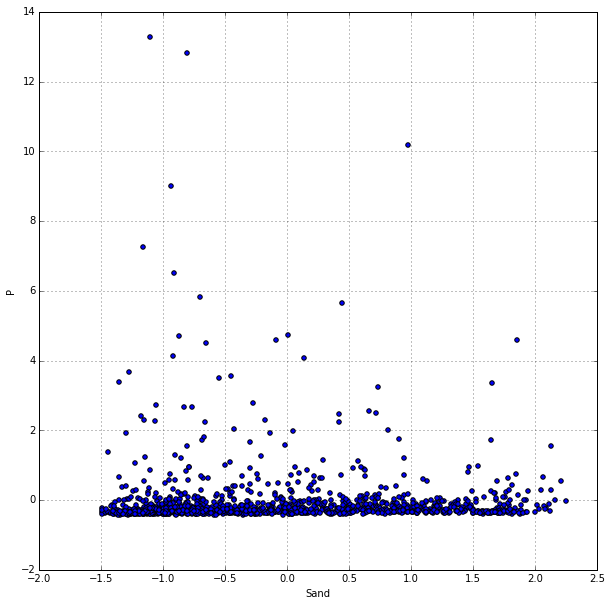

In [282]:
import statsmodels.api as sm
#mod = sm.OLS(df_train.P, df_train.Sand).fit()
#mod = sm.OLS.from_formula('P ~ Sand', data=df_train).fit()
fig, ax = plt.subplots()
#sm.graphics.abline_plot(model_results=mod, ax=ax)
df_train.plot(x='Sand', y='P', kind='scatter', figsize=(10,10), ax=ax)

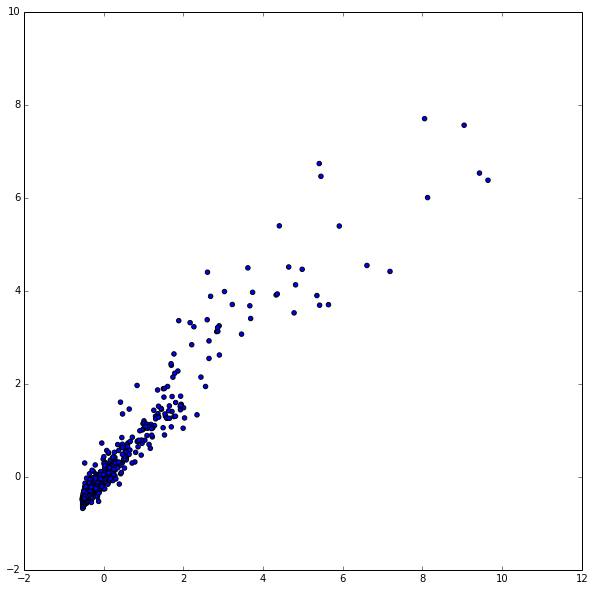

In [220]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_train['Ca']), list(df_train_pred_Ca['Cross-Validation Prediction']))

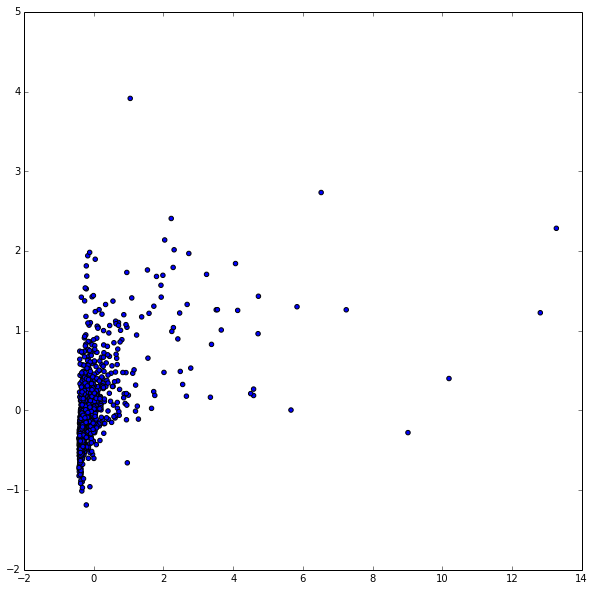

In [198]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_train['P']), list(df_train_pred_P['Cross-Validation Prediction']))

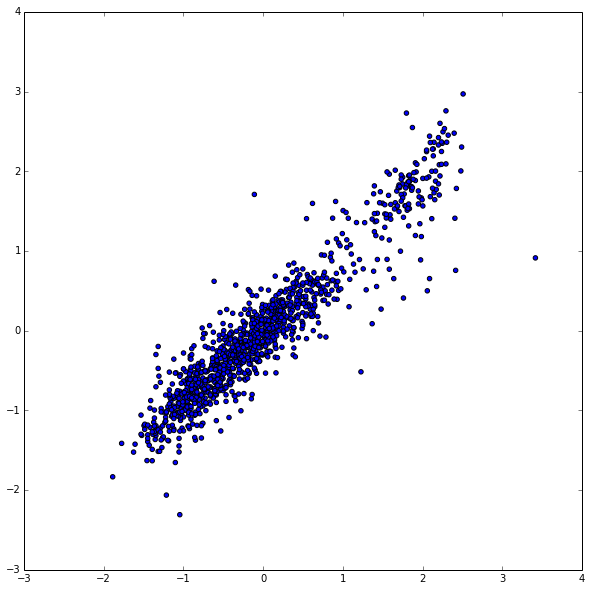

In [305]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_train['pH']), list(df_train_pred_pH['Cross-Validation Prediction']))

In [60]:
import ace

In [225]:
df_train[spatial_predictors][:5]

BSAN      BSAS      BSAV       CTI      ELEV       EVI      LSTD  \
0 -0.630435 -0.700000 -0.783875 -0.364146  1.165479  1.062682 -0.716713   
1 -0.630435 -0.700000 -0.783875 -0.364146  1.165479  1.062682 -0.716713   
2 -0.753623 -0.836364 -0.929451 -0.633972  1.544098  1.156705 -1.282552   
3 -0.753623 -0.836364 -0.929451 -0.633972  1.544098  1.156705 -1.282552   
4 -0.688406 -0.763636 -0.884658 -0.583576  1.276837  1.191691 -1.206971   

       LSTN      REF1      REF2      REF3      REF7      RELI      TMAP  \
0 -0.090016 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708   
1 -0.090016 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708   
2 -0.088336 -0.935273 -0.631725 -0.832298 -0.814516  1.806660  0.190708   
3 -0.088336 -0.935273 -0.631725 -0.832298 -0.814516  1.806660  0.190708   
4  0.011420 -0.906182 -0.528757 -0.795031 -0.780242  0.430513  0.190708   

       TMFI    Depth  
0  0.056843  Topsoil  
1  0.056843  Subsoil  
2  0.056843  Topsoil  
3  0.056843  Subsoil  
4  0.056843  Topsoil  

[5 rows x 16 columns]

In [226]:
df_train[targets][:5]

Ca         P        pH       SOC      Sand
0 -0.295749 -0.041336 -1.129366  0.353258  1.269748
1 -0.387442 -0.231552 -1.531538 -0.264023  1.692209
2 -0.248601 -0.224635 -0.259551  0.064152  2.091835
3 -0.332195 -0.318014 -0.577548 -0.318719  2.118477
4 -0.438350 -0.010210 -0.699135 -0.310905  2.164148

[5 rows x 5 columns]

In [69]:
ace_Ca = ace.ace(df_train_Ca[list(bands)+['Ca']],'Ca',['Depth'])
ace_P = ace.ace(df_train_P[list(bands)+['P']],'P',['Depth'])
ace_pH = ace.ace(df_train_pH[list(bands)+['pH']],'pH',['Depth'])
ace_SOC = ace.ace(df_train_SOC[list(bands)+['SOC']],'SOC',['Depth'])
ace_Sand = ace.ace(df_train_Sand[list(bands)+['Sand']],'Sand',['Depth'])

In [70]:
ace_Ca[3570:3578]

[0.19962214927266486,
 0.19306030838697774,
 0.18767389300967541,
 0.18031297422119041,
 0.18483208092005921,
 0.18132993930872765,
 0.17912666660230936,
 1]

In [71]:
df_ace = pd.DataFrame(np.asarray([ace_Ca[:3577], ace_P[:3577], ace_pH[:3577], ace_SOC[:3577], ace_Sand[:3577]]).T, columns=targets, index=bands)
df_ace[:5]

Ca         P        pH       SOC      Sand
m7497.96  0.234179  0.058079  0.034094  0.276307  0.174266
m7496.04  0.231868  0.058450  0.033409  0.277806  0.173119
m7494.11  0.228933  0.059158  0.032876  0.278030  0.173292
m7492.18  0.228432  0.057494  0.033671  0.277051  0.175001
m7490.25  0.231189  0.055168  0.035843  0.275590  0.177243

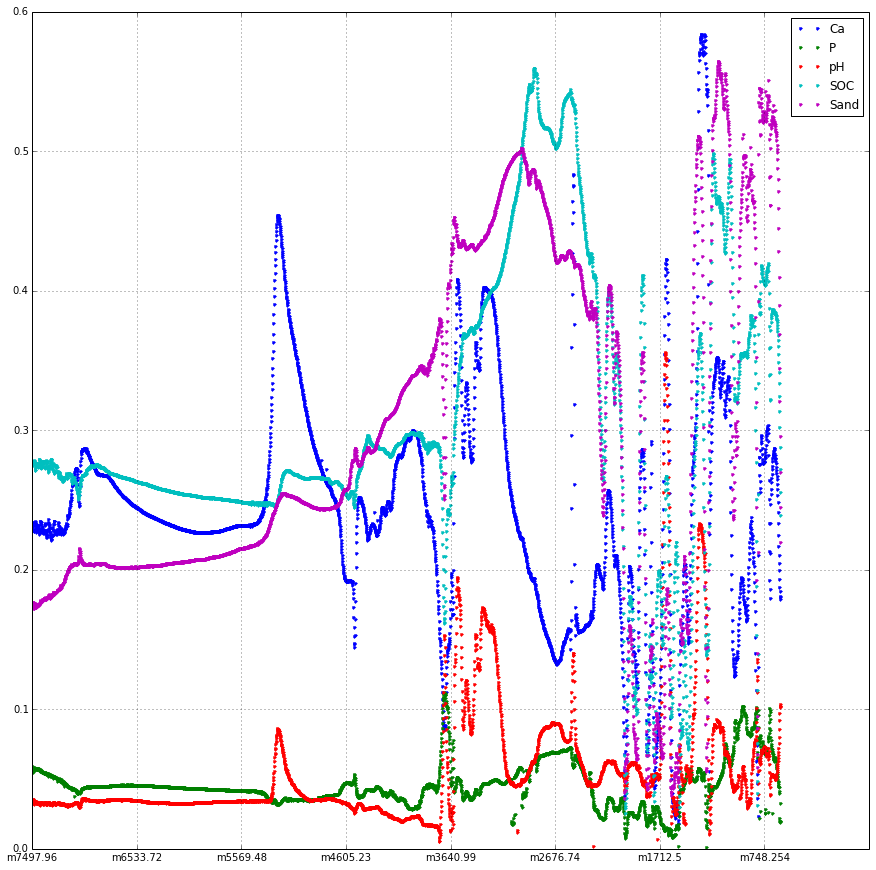

In [270]:
df_ace.plot(style='.', figsize=(15,15))

In [72]:
df_ace[:2]

Ca         P        pH       SOC      Sand
m7497.96  0.234179  0.058079  0.034094  0.276307  0.174266
m7496.04  0.231868  0.058450  0.033409  0.277806  0.173119

In [74]:
df_ace.to_csv('MIR_ace.csv', mode='wb')

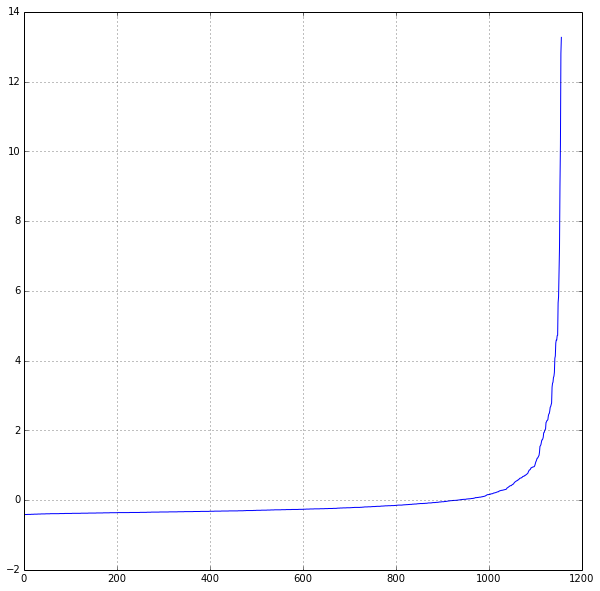

In [276]:
df_train['P'].order().plot(use_index=False)

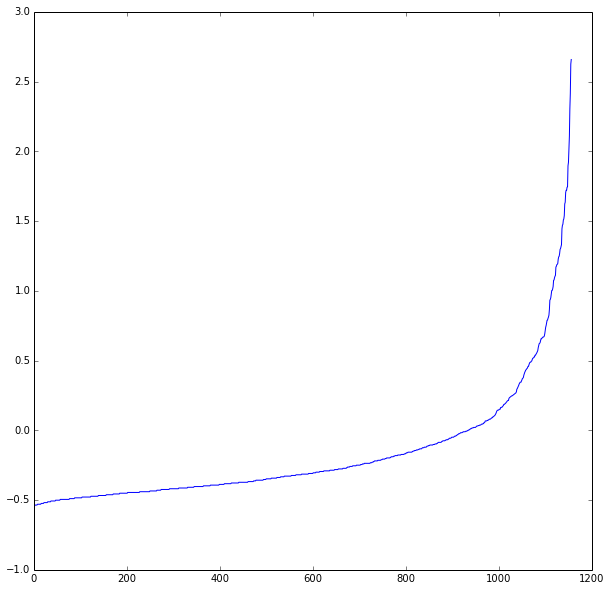

In [491]:
plt.plot(log(list(df_train['P'].order()+1)))

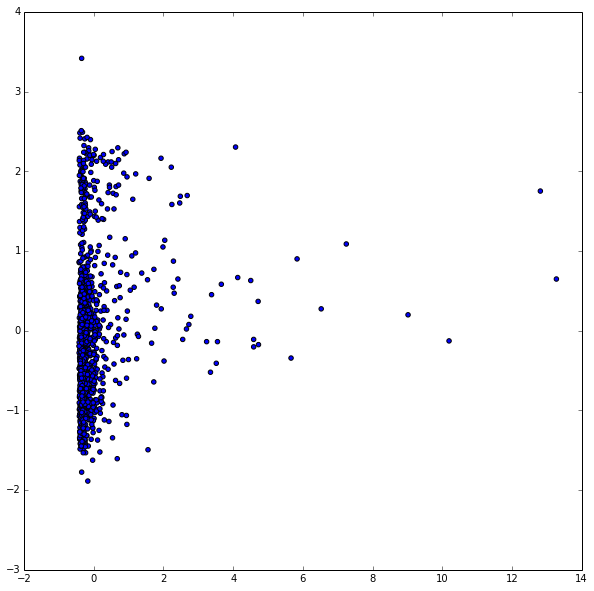

In [279]:
scatter(df_train['P'], df_train['pH'])

In [280]:
ace_spatial_Ca = ace.ace(df_train_Ca[list(spatial_predictors)+['Ca']],'Ca',['Depth'])
ace_spatial_P = ace.ace(df_train_P[list(spatial_predictors)+['P']],'P',['Depth'])
ace_spatial_pH = ace.ace(df_train_pH[list(spatial_predictors)+['pH']],'pH',['Depth'])
ace_spatial_SOC = ace.ace(df_train_SOC[list(spatial_predictors)+['SOC']],'SOC',['Depth'])
ace_spatial_Sand = ace.ace(df_train_Sand[list(spatial_predictors)+['Sand']],'Sand',['Depth'])

In [284]:
len(ace_spatial_Ca)

17

In [286]:
df_spatial_ace = pd.DataFrame(np.asarray([ace_spatial_Ca[:16], ace_spatial_P[:16], ace_spatial_pH[:16], 
                                          ace_spatial_SOC[:16], ace_spatial_Sand[:16]]).T,
                              columns=targets, index=spatial_predictors)
df_spatial_ace

Ca         P        pH       SOC      Sand
BSAN   0.095252  0.073480  0.160641  0.159885  0.118438
BSAS   0.156156  0.044059  0.335404  0.218878  0.194152
BSAV   0.152139  0.049798  0.322803  0.158729  0.046269
CTI    0.013691  0.009316  0.045752  0.154222  0.089784
ELEV   0.294236  0.047884  0.097838  0.206003  0.131673
EVI    0.197434  0.063720  0.369318  0.088670  0.058555
LSTD   0.181749  0.052903  0.332777  0.292363  0.167677
LSTN   0.314448  0.071850  0.233619  0.116346  0.151791
REF1   0.148346  0.052705  0.279044  0.174344  0.057774
REF2   0.088212  0.025308  0.054374  0.060477  0.068558
REF3   0.128609  0.062108  0.189421  0.090973  0.034890
REF7   0.151145  0.031105  0.346724  0.251594  0.157981
RELI   0.044582  0.019266  0.092827  0.333193  0.206550
TMAP   0.409887  0.110005  0.463834  0.336809  0.571184
TMFI   0.385754  0.151029  0.515224  0.284769  0.465855
Depth  0.014613  0.117310  0.014283  0.060187  0.003839

[16 rows x 5 columns]

In [289]:
df_spatial_ace.sum(axis=1)

BSAN     0.607696
BSAS     0.948649
BSAV     0.729739
CTI      0.312766
ELEV     0.777635
EVI      0.777696
LSTD     1.027469
LSTN     0.888054
REF1     0.712213
REF2     0.296930
REF3     0.506001
REF7     0.938549
RELI     0.696418
TMAP     1.891719
TMFI     1.802631
Depth    0.210232
dtype: float64

In [290]:
# sort spatial features by most significant ACE
df_spatial_ace['Sum'] = df_spatial_ace.sum(axis=1)
df_spatial_ace.sort('Sum', ascending=False)

Ca         P        pH       SOC      Sand       Sum
TMAP   0.409887  0.110005  0.463834  0.336809  0.571184  1.891719
TMFI   0.385754  0.151029  0.515224  0.284769  0.465855  1.802631
LSTD   0.181749  0.052903  0.332777  0.292363  0.167677  1.027469
BSAS   0.156156  0.044059  0.335404  0.218878  0.194152  0.948649
REF7   0.151145  0.031105  0.346724  0.251594  0.157981  0.938549
LSTN   0.314448  0.071850  0.233619  0.116346  0.151791  0.888054
EVI    0.197434  0.063720  0.369318  0.088670  0.058555  0.777696
ELEV   0.294236  0.047884  0.097838  0.206003  0.131673  0.777635
BSAV   0.152139  0.049798  0.322803  0.158729  0.046269  0.729739
REF1   0.148346  0.052705  0.279044  0.174344  0.057774  0.712213
RELI   0.044582  0.019266  0.092827  0.333193  0.206550  0.696418
BSAN   0.095252  0.073480  0.160641  0.159885  0.118438  0.607696
REF3   0.128609  0.062108  0.189421  0.090973  0.034890  0.506001
CTI    0.013691  0.009316  0.045752  0.154222  0.089784  0.312766
REF2   0.088212  0.025308  0.054374  0.060477  0.068558  0.296930
Depth  0.014613  0.117310  0.014283  0.060187  0.003839  0.210232

[16 rows x 6 columns]

In [297]:
df_ace_spatial_P = pd.DataFrame(ace_spatial_P[:16] , index=spatial_predictors, columns=['P'])
df_ace_spatial_P.sort('P', ascending=False)

P
TMFI   0.151029
Depth  0.117310
TMAP   0.110005
BSAN   0.073480
LSTN   0.071850
EVI    0.063720
REF3   0.062108
LSTD   0.052903
REF1   0.052705
BSAV   0.049798
ELEV   0.047884
BSAS   0.044059
REF7   0.031105
REF2   0.025308
RELI   0.019266
CTI    0.009316

[16 rows x 1 columns]

In [311]:
df_train_pH_high = df_train_pred.query('pH >= 0.5')
df_train_pH_low = df_train_pred.query('pH < 0.5')

In [132]:
#df_train.ix[df_train_pH_high.index, bands]

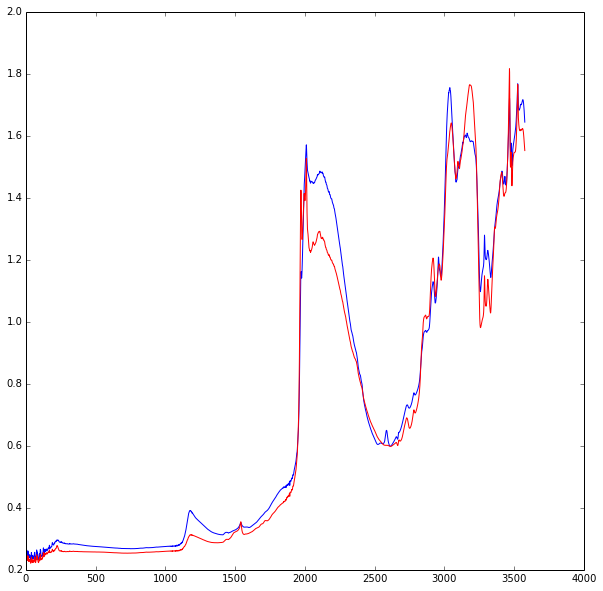

In [312]:
plt.rcParams['figure.figsize'] = 10,10
plt.plot(list(range(len(df_train[bands].columns))), list(df_train.ix[df_train_pH_high.index, bands].mean()), 'b-',
         list(range(len(df_train[bands].columns))), list(df_train.ix[df_train_pH_low.index, bands].mean()), 'r-')

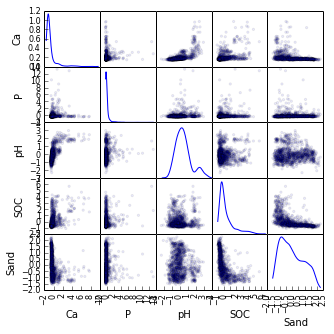

In [318]:
scatter_matrix(df_train_P2[targets], alpha=0.08, figsize=(len(targets),len(targets)), diagonal='kde');

In [367]:
#plt.rcParams['figure.figsize'] = 10,10
#plt.plot(list(range(len(df_train[bands].columns))), list(df_train.ix[df_train_pH_high.index, bands]), 'b-',)
#         list(range(len(df_train[bands].columns))), list(df_train.ix[df_train_pH_low.index, bands].mean()), 'r-')

In [319]:
#list(df_train.ix[df_train_pH_high.index, bands])

## Drop C02 and take first derivative

In [326]:
df_train_noCO2 = pd.read_csv("train_nco2.csv")

In [330]:
df_train_noCO2['P'] = df_train.P

In [331]:
df_train_noCO2[:2]

PIDN      BSAN  BSAS     BSAV       CTI      ELEV       EVI      LSTD  \
0     1 -0.630435  -0.7 -0.78387 -0.364146  1.165479  1.062682 -0.716713   
1     2 -0.630435  -0.7 -0.78387 -0.364146  1.165479  1.062682 -0.716713   

       LSTN      REF1      REF2      REF3      REF7      RELI      TMAP  \
0 -0.090016 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708   
1 -0.090016 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708   

       TMFI    Depth  m7496.04  m7494.11  m7492.18      
0  0.056843  Topsoil -0.001416 -0.001389  0.000606 ...  
1  0.056843  Subsoil -0.001637 -0.001591  0.000974 ...  

[2 rows x 3579 columns]

In [332]:
df_train_noCO2.to_csv('train_nco2_P.csv', index=False, mode='wb')

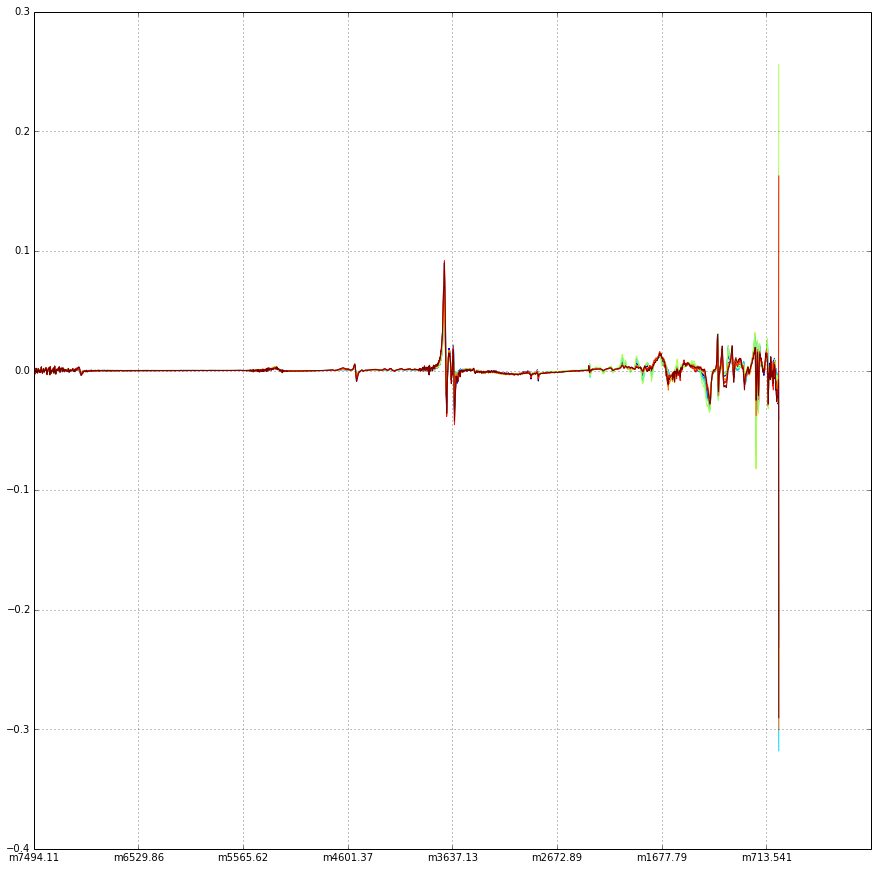

In [340]:
noCO2_bands = df_train_noCO2.columns[18:]
df_train_noCO2[noCO2_bands][0:10].transpose().plot(legend=False, figsize=(15,15), colormap='jet')

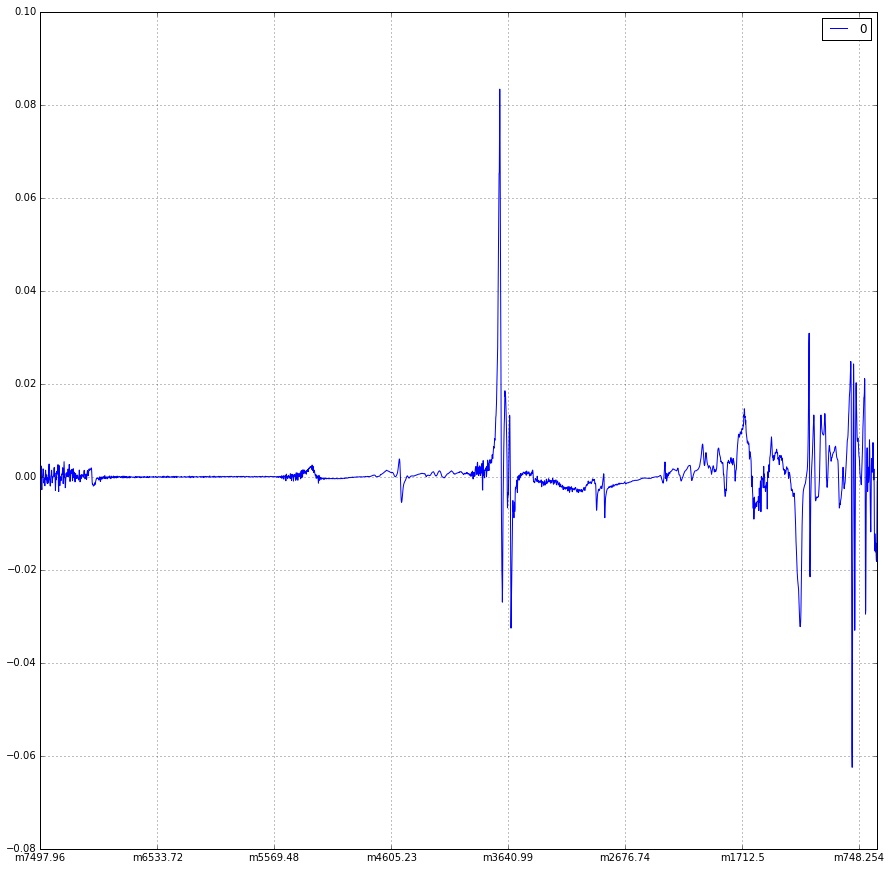

In [256]:
df_train[spectra][:1].transpose().diff().plot()

In [346]:
df_train_noCO2[noCO2_bands][:1].values[0]

array([-0.001389  ,  0.000606  ,  0.002325  , ..., -0.00751   ,
       -0.00089   , -0.04133638])

## Transform MIR

In [77]:
import pywt

In [15]:
cA, cD = pywt.dwt(df_train[bands][:1].values[0], 'db3')

In [133]:
#plt.rcParams['figure.figsize'] = 10,10
#plt.plot(list(range(len(cA))), cA, 'b-',
#         list(range(len(cD))), cD, 'r-')

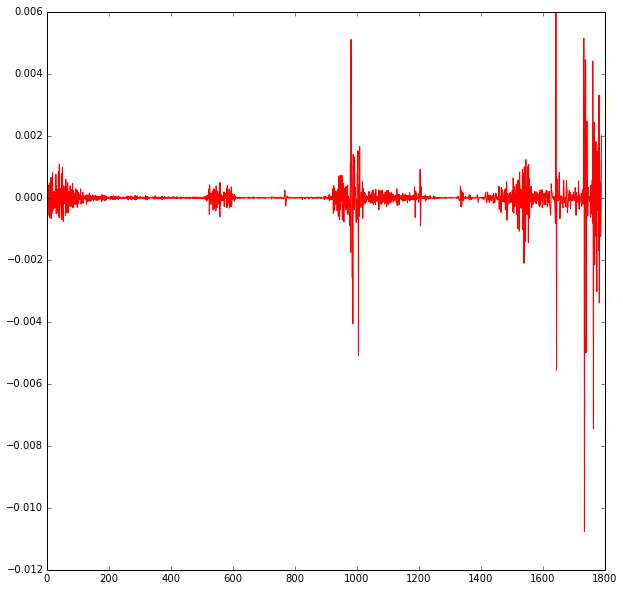

In [366]:
plt.rcParams['figure.figsize'] = 10,10
plt.plot(list(range(len(cD))), cD, 'r-')

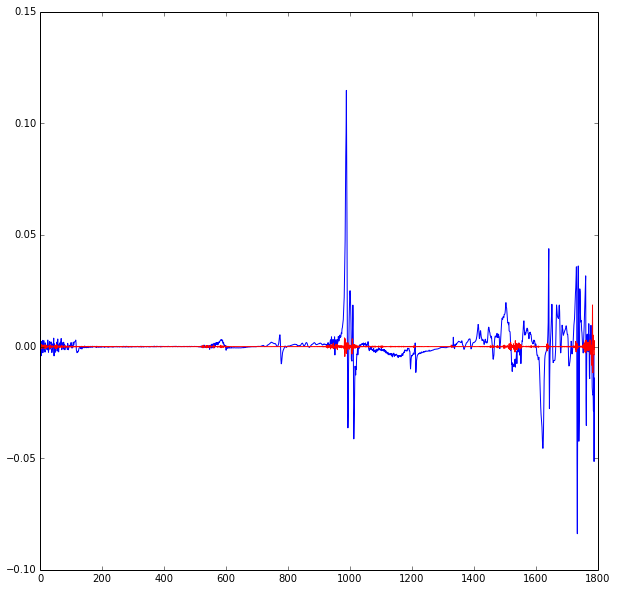

In [360]:
plt.rcParams['figure.figsize'] = 10,10
plt.plot(list(range(len(cA))), cA, 'b-',
         list(range(len(cD))), cD, 'r-')

In [102]:
coeffs = pywt.wavedec(df_train[bands][:1].values[0], 'db2', mode='sym')

In [79]:
sum(map(len, coeffs))

3581

In [261]:
def coef_pyramid_plot(coefs, first=0, scale='uniform', ax=None):
    """
    Parameters
    ----------
    coefs : array-like
        Wavelet Coefficients. Expects an iterable in order Cdn, Cdn-1, ...,
        Cd1, Cd0.
    first : int, optional
        The first level to plot.
    scale : str {'uniform', 'level'}, optional
        Scale the coefficients using the same scale or independently by
        level.
    ax : Axes, optional
        Matplotlib Axes instance

    Returns
    -------
    Figure : Matplotlib figure instance
        Either the parent figure of `ax` or a new pyplot.Figure instance if
        `ax` is None.
    """

    if ax is None:
        import matplotlib.pyplot as plt
        fig = plt.figure()
        ax = fig.add_subplot(111, axisbg='lightgrey')
    else:
        fig = ax.figure

    n_levels = len(coefs)
    n = 2**(n_levels - 1) # assumes periodic
    
    if scale == 'uniform':
        biggest = [np.max(np.abs(np.hstack(coefs)))] * n_levels
    else:
        # multiply by 2 so the highest bars only take up .5
        biggest = [np.max(np.abs(i))*2 for i in coefs]

    for i in range(first,n_levels):
        x = np.linspace(2**(n_levels - 2 - i), n - 2**(n_levels - 2 - i), 2**i)
        ymin = n_levels - i - 1 + first
        yheight = coefs[i]/biggest[i]
        ymax = yheight + ymin
        print str(len(x))
        ax.vlines(x, ymin, ymax, linewidth=1.1)

    ax.set_xlim(0,n)
    ax.set_ylim(first - 1, n_levels)
    ax.yaxis.set_ticks(np.arange(n_levels-1,first-1,-1))
    ax.yaxis.set_ticklabels(np.arange(first,n_levels))
    ax.tick_params(top=False, right=False, direction='out', pad=6)
    ax.set_ylabel("Levels", fontsize=14)
    ax.grid(True, alpha=.85, color='white', axis='y', linestyle='-')
    ax.set_title('Wavelet Detail Coefficients', fontsize=16,
            position=(.5,1.05))
    fig.subplots_adjust(top=.89)

    return fig

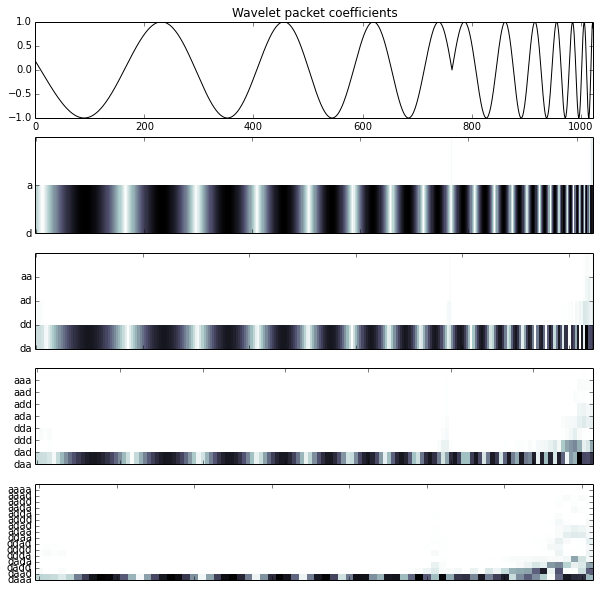

In [313]:
import numpy
import pylab

from pywt import WaveletPacket

x = numpy.arange(612 - 80, 20, -0.5) / 150.
#data = numpy.sin(20 * pylab.log(x)) * numpy.sign((pylab.log(x)))
data = df_train[bands][:1].values[0] 
# from sample_data import ecg as data
#matplotlib.cbook.get_sample_data('eeg.dat')

wp = WaveletPacket(data, 'sym5', maxlevel=4)

pylab.bone()
pylab.subplot(wp.maxlevel + 1, 1, 1)
pylab.plot(data, 'k')
pylab.xlim(0, len(data) - 1)
pylab.title("Wavelet packet coefficients")

for i in range(1, wp.maxlevel + 1):
    ax = pylab.subplot(wp.maxlevel + 1, 1, i + 1)
    nodes = wp.get_level(i, "freq")
    nodes.reverse()
    labels = [n.path for n in nodes]
    values = -abs(numpy.array([n.data for n in nodes]))
    pylab.imshow(values, interpolation='nearest', aspect='auto')
    pylab.yticks(numpy.arange(len(labels) - 0.5, -0.5, -1), labels)
    pylab.setp(ax.get_xticklabels(), visible=False)

pylab.show()

In [309]:
import matplotlib.cm as cm
import pylab

import pywt

#x = pylab.arange(0, 1, 1. / 512)
data = df_train[bands][:1].values[0] # pylab.sin((5 * 50 * pylab.pi * x ** 2))

wavelet = 'db2'
level = 1
order = "freq"  # "normal"
interpolation = 'nearest'
cmap = cm.cool

wp = pywt.WaveletPacket(data, wavelet, 'sym', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = pylab.array([n.data for n in nodes[0]], 'd')
#values = abs(values)

f = pylab.figure()
#f.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
pylab.subplot(2, 1, 1)
pylab.title("signal")
pylab.plot( data, 'b')
#pylab.xlim(0, x[-1])

ax = pylab.subplot(2, 1, 2)
pylab.title("Wavelet packet coefficients at level %d" % level)
pylab.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
    origin="lower", extent=[0, 1, 0, len(values)])
pylab.yticks(pylab.arange(0.5, len(labels) + 0.5), labels)
# pylab.setp(ax.get_xticklabels(), visible=False)

# pylab.figure(2)
# pylab.specgram(data, NFFT=64, noverlap=32, cmap=cmap)
# pylab.imshow(values, origin='upper', extent=[-1,1,-1,1], interpolation='nearest')

pylab.show()

TypeError: Invalid path parameter type - expected string but got <type 'int'>.

In [308]:
nodes[0]

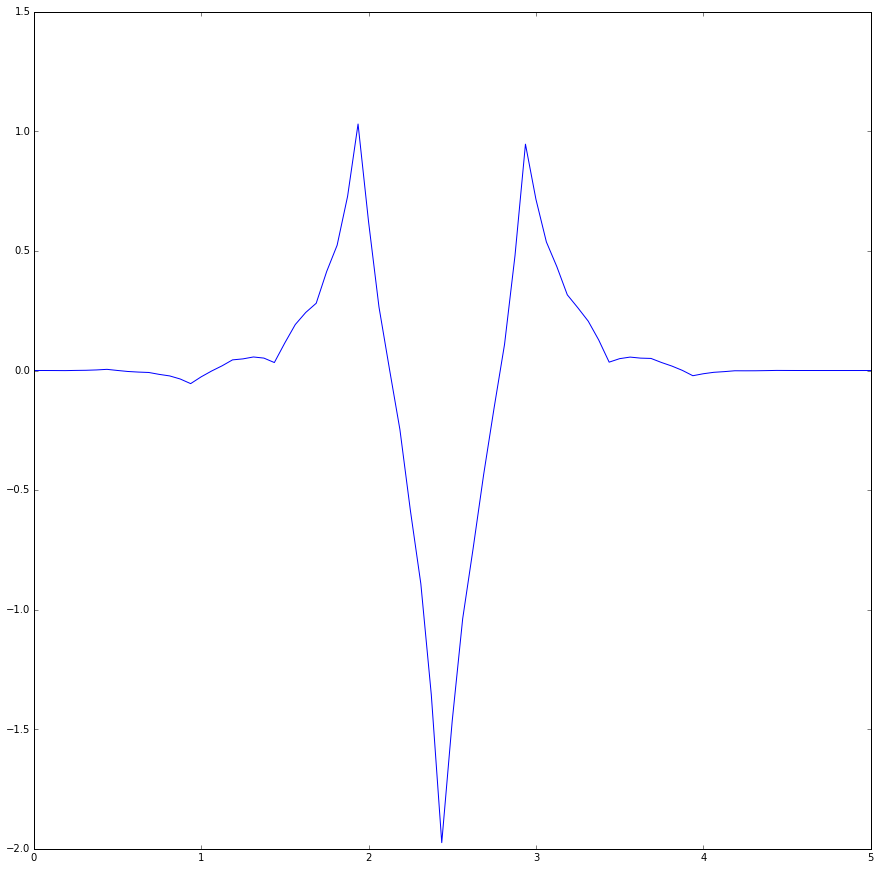

In [244]:
[phi, psi, x] = pywt.Wavelet('coif1').wavefun(level=4)
pylab.plot(x, psi)

In [245]:
fig = coef_pyramid_plot(coeffs)
fig.tight_layout()

NameError: name 'coef_pyramid_plot' is not defined

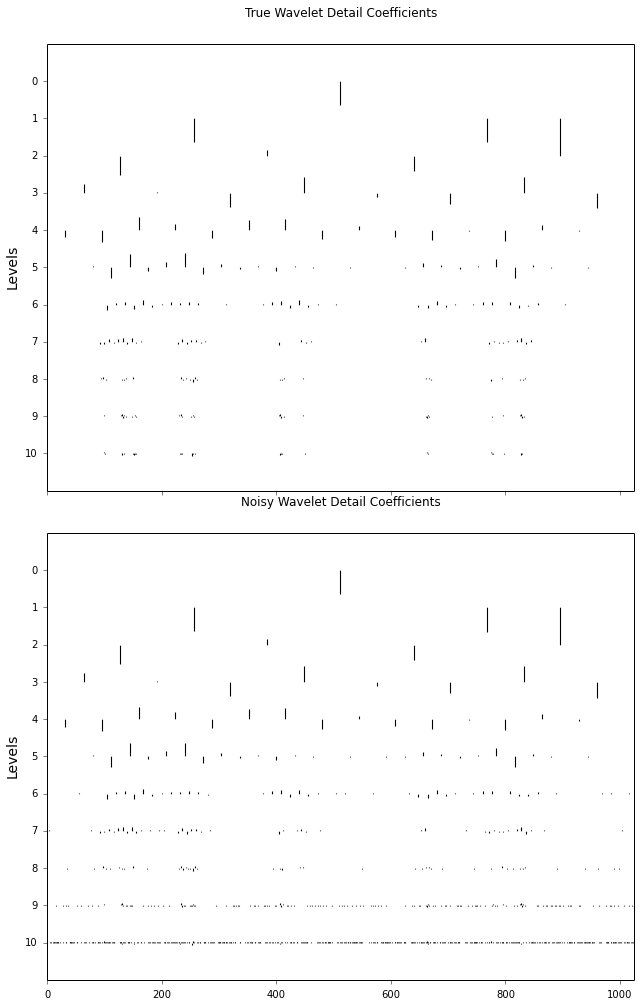

In [213]:
from scipy import stats
import numpy as np

def blocks(x):
    """
    Piecewise constant function with jumps at t.
 
    Constant scaler is not present in Donoho and Johnstone.
    """
    K = lambda x : (1 + np.sign(x))/2.
    t = np.array([[.1, .13, .15, .23, .25, .4, .44, .65, .76, .78, .81]]).T
    h = np.array([[4, -5, 3, -4, 5, -4.2, 2.1, 4.3, -3.1, 2.1, -4.2]]).T
    return 3.655606 * np.sum(h*K(x-t), axis=0)

np.random.seed(12345)
blck = blocks(np.linspace(0,1,2**11))
nblck = blck + stats.norm().rvs(2**11)

true_coefs = pywt.wavedec(blck, 'db8', level=11, mode='per')
noisy_coefs = pywt.wavedec(nblck, 'db8', level=11, mode='per')

fig, axes = plt.subplots(2, 1, figsize=(9,14), sharex=True)

fig = coef_pyramid_plot(true_coefs[1:], ax=axes[0]) # omit smoothing coefs
axes[0].set_title("True Wavelet Detail Coefficients");

fig = coef_pyramid_plot(noisy_coefs[1:], ax=axes[1]) ;
axes[1].set_title("Noisy Wavelet Detail Coefficients");

fig.tight_layout()

In [242]:
from statsmodels.robust import stand_mad
import statsmodels.api as sm

def visualize(data, wavelet, sigma=None):
    coefs = pywt.wavedec(data, wavelet)

    if sigma is None:
        sigma = stand_mad(coefs[-1])

    thresh = sigma*np.sqrt(2*np.log(len(data)))

    denoised = coefs[:]
    denoised[1:] = (pywt.thresholding.soft(i, value=thresh) for i in denoised[1:])

    rec = pywt.waverec(denoised, wavelet)

    plt.plot(data, 'r')
    plt.plot(rec, 'g')
    plt.show()

    return rec

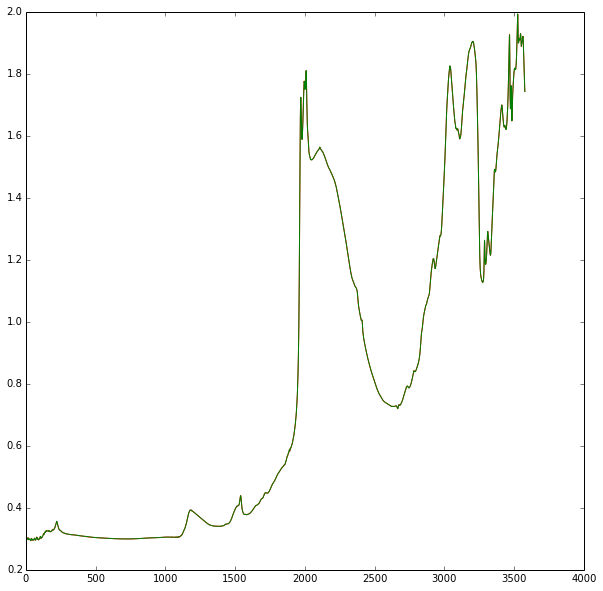

array([ 0.30230305,  0.30154243,  0.30031273, ...,  1.75083832,
        1.7435469 ,  1.74281579])

In [248]:
visualize(df_train[bands][:1].values[0], 'db2')

In [80]:
def coeffs_columns(coeffs):
    c_columns = []
    i = 0
    for c in map(len, coeffs):
        i += 1
        for j in range(1,c+1):
            c_columns.append('C'+str(i)+'_'+str(j))
    return c_columns

In [81]:
def flat_coeffs(coeffs):
    return [item for sublist in coeffs for item in sublist] 

In [85]:
len(df_train[bands][:1].values[0])

3577

In [103]:
ll_train_coeffs = []
for row in df_train[bands].values:
    ll_train_coeffs.append([item for sublist in pywt.wavedec(row, 'db2') for item in sublist])

In [104]:
flatend_coeffs = flat_coeffs(coeffs)
len(flatend_coeffs)

3600

In [105]:
# coeffs_columns(coeffs)
# flatend_coeffs

In [107]:
df_train_coeffs = pd.DataFrame(ll_train_coeffs, columns=coeffs_columns(coeffs))
df_train_coeffs[:2]

C1_1      C1_2      C1_3       C1_4       C1_5       C1_6      C2_1  \
0  9.641303  9.711513  7.680170  23.012967  37.265830  54.135815 -0.022613   
1  8.600063  8.708675  6.710321  24.745826  38.211228  56.537628 -0.042837   

       C2_2      C2_3      C2_4    ...     C11_1781  C11_1782  C11_1783  \
0  0.187194 -7.841085 -0.583590    ...     0.002609 -0.001032  0.005624   
1  0.263580 -8.724366  0.091618    ...    -0.002509  0.002795  0.002809   

   C11_1784  C11_1785  C11_1786  C11_1787  C11_1788  C11_1789  C11_1790  
0 -0.001330  0.001482 -0.000586  0.001075 -0.001213 -0.004671 -0.004869  
1  0.001068 -0.002435  0.003672  0.000778 -0.005397 -0.004104 -0.003337  

[2 rows x 3600 columns]

In [108]:
df_train_coeffs[:2]

C1_1      C1_2      C1_3       C1_4       C1_5       C1_6      C2_1  \
0  9.641303  9.711513  7.680170  23.012967  37.265830  54.135815 -0.022613   
1  8.600063  8.708675  6.710321  24.745826  38.211228  56.537628 -0.042837   

       C2_2      C2_3      C2_4    ...     C11_1781  C11_1782  C11_1783  \
0  0.187194 -7.841085 -0.583590    ...     0.002609 -0.001032  0.005624   
1  0.263580 -8.724366  0.091618    ...    -0.002509  0.002795  0.002809   

   C11_1784  C11_1785  C11_1786  C11_1787  C11_1788  C11_1789  C11_1790  
0 -0.001330  0.001482 -0.000586  0.001075 -0.001213 -0.004671 -0.004869  
1  0.001068 -0.002435  0.003672  0.000778 -0.005397 -0.004104 -0.003337  

[2 rows x 3600 columns]

In [109]:
df_train_coeffs.to_csv('train_wavelet.csv', index=False)

In [28]:
df_train[spatial_predictors][:3]

BSAN      BSAS      BSAV       CTI      ELEV       EVI      LSTD  \
0 -0.630435 -0.700000 -0.783875 -0.364146  1.165479  1.062682 -0.716713   
1 -0.630435 -0.700000 -0.783875 -0.364146  1.165479  1.062682 -0.716713   
2 -0.753623 -0.836364 -0.929451 -0.633972  1.544098  1.156705 -1.282552   

       LSTN      REF1      REF2      REF3      REF7      RELI      TMAP  \
0 -0.090016 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708   
1 -0.090016 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708   
2 -0.088336 -0.935273 -0.631725 -0.832298 -0.814516  1.806660  0.190708   

       TMFI    Depth  
0  0.056843  Topsoil  
1  0.056843  Subsoil  
2  0.056843  Topsoil  

[3 rows x 16 columns]

In [29]:
df_train_wave = pd.concat([df_train[spatial_predictors], df_train_coeffs], axis=1)
df_train_wave[:3]

BSAN      BSAS      BSAV       CTI      ELEV       EVI      LSTD  \
0 -0.630435 -0.700000 -0.783875 -0.364146  1.165479  1.062682 -0.716713   
1 -0.630435 -0.700000 -0.783875 -0.364146  1.165479  1.062682 -0.716713   
2 -0.753623 -0.836364 -0.929451 -0.633972  1.544098  1.156705 -1.282552   

       LSTN      REF1      REF2      REF3      REF7      RELI      TMAP  \
0 -0.090016 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708   
1 -0.090016 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708   
2 -0.088336 -0.935273 -0.631725 -0.832298 -0.814516  1.806660  0.190708   

       TMFI    Depth       C1_1       C1_2      C1_3       C1_4      
0  0.056843  Topsoil   9.641303   9.711513  7.680170  23.012967 ...  
1  0.056843  Subsoil   8.600063   8.708675  6.710321  24.745826 ...  
2  0.056843  Topsoil  10.129996  10.167477  7.741483  19.021224 ...  

[3 rows x 3616 columns]

In [30]:
df_train_wave['P'] = log(df_train.P+1)

In [31]:
df_train_wave.to_csv('train_wave_logP.csv', index_name='ID', mode='wb')

In [32]:
df_train_wave_topsoil = df_train_wave.query('Depth == "Topsoil"')

In [33]:
df_train_wave_topsoil.to_csv('train_wave_topsoil_logP.csv', index_name='ID', mode='wb')

In [452]:
targets

['Ca', 'P', 'pH', 'SOC', 'Sand']

In [453]:
df_train_wave['Ca'] = df_pred['Ca']
df_train_wave['pred_P'] = df_pred['P']
df_train_wave['pH'] = df_pred['pH']
df_train_wave['SOC'] = df_pred['SOC']
df_train_wave['Sand'] = df_pred['Sand']

In [454]:
df_train_wave_topsoil_pred = df_train_wave.query('Depth == "Topsoil"')
df_train_wave_topsoil_pred.to_csv('train_wave_topsoil_pred.csv', index_name='ID', mode='wb')

In [146]:
df_train_wave_Ca = df_train_wave.copy()
del df_train_wave_Ca['P']
#del df_train_wave_Ca['Ca']
#del df_train_wave_Ca['pH']
#del df_train_wave_Ca['SOC']
#del df_train_wave_Ca['Sand']
df_train_wave_Ca['Ca'] = df_train['Ca']
df_train_wave_Ca[:2]

BSAN  BSAS      BSAV       CTI      ELEV       EVI      LSTD      LSTN  \
0 -0.630435  -0.7 -0.783875 -0.364146  1.165479  1.062682 -0.716713 -0.090016   
1 -0.630435  -0.7 -0.783875 -0.364146  1.165479  1.062682 -0.716713 -0.090016   

       REF1      REF2      REF3      REF7      RELI      TMAP      TMFI  \
0 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708  0.056843   
1 -0.861091 -0.537106 -0.722567 -0.646673  1.687734  0.190708  0.056843   

     Depth      C1_1      C1_2      C1_3       C1_4      
0  Topsoil  9.641303  9.711513  7.680170  23.012967 ...  
1  Subsoil  8.600063  8.708675  6.710321  24.745826 ...  

[2 rows x 3617 columns]

In [148]:
df_train_wave_Ca.to_csv('train_wave_Ca.csv', index_name='ID', mode='wb')

In [143]:
df_train_wave_pH = df_train_wave.copy()
del df_train_wave_pH['P']
df_train_wave_pH['pH'] = df_train['pH']
df_train_wave_pH.to_csv('train_wave_pH.csv', index_name='ID', mode='wb')

In [144]:
df_train_wave_SOC = df_train_wave.copy()
del df_train_wave_SOC['P']
df_train_wave_SOC['SOC'] = df_train['SOC']
df_train_wave_SOC.to_csv('train_wave_SOC.csv', index_name='ID', mode='wb')

In [145]:
df_train_wave_Sand = df_train_wave.copy()
del df_train_wave_Sand['P']
df_train_wave_Sand['Sand'] = df_train['Sand']
df_train_wave_Sand.to_csv('train_wave_Sand.csv', index_name='ID', mode='wb')

## Prep Test Set

In [468]:
df_test[:2]

PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
0  09gt9UK5  0.210899  0.209221  0.207645  0.208714  0.211972  0.213562   
1  0BVvxJ6a  0.191650  0.184120  0.177070  0.180624  0.192343  0.197502   

   m7486.39  m7484.46  m7482.54  m7480.61  m7478.68  m7476.75  m7474.82  \
0  0.211267  0.208248  0.207341  0.207325  0.207134  0.207397  0.208380   
1  0.187655  0.175447  0.172639  0.172654  0.172667  0.176937  0.183838   

   m7472.89  m7470.97  m7469.04  m7467.11  m7465.18  m7463.25      
0  0.209628  0.210512  0.210348  0.209535  0.209280  0.208996 ...  
1  0.191058  0.196595  0.195682  0.190070  0.187725  0.186047 ...  

[2 rows x 3595 columns]

In [469]:
ll_test_coeffs = []
for row in df_test[bands].values:
    ll_test_coeffs.append([item for sublist in pywt.wavedec(row, 'db2') for item in sublist])

In [475]:
test_coeffs_columns = coeffs_columns(coeffs)

In [476]:
df_test_coeffs = pd.DataFrame(ll_test_coeffs, columns=test_coeffs_columns[:len(ll_test_coeffs[0])])
df_test_coeffs[:2]

C1_1      C1_2      C1_3       C1_4       C1_5       C1_6      C2_1  \
0  6.698687  6.749421  5.575039  19.074829  33.841144  51.733963 -0.019869   
1  5.967300  6.074836  3.323561  18.942731  32.633439  49.311303 -0.010542   

       C2_2      C2_3      C2_4      C2_5      C2_6      C3_1      C3_2  \
0  0.123588 -6.997817 -2.503587  4.782911  0.159551  0.027366  0.211653   
1  0.366442 -7.952493 -1.525940  4.510076 -0.574613  0.043251  0.207384   

       C3_3      C3_4     C3_5      C3_6      C3_7      C3_8      
0 -0.061933  0.102930 -5.97578  5.834099 -6.730698 -0.554853 ...  
1 -0.075835  0.513956 -6.48768  7.568576 -6.407359 -0.173222 ...  

[2 rows x 3600 columns]

In [477]:
df_test_wave = pd.concat([df_test[spatial_predictors], df_test_coeffs], axis=1)
#df_test_wave['PIDN'] = df_test.PIDN
df_test_wave.to_csv('test_wave.csv', index_name='ID', mode='wb')

## Confirm P

In [97]:
df_train_wave_pred_P = pd.read_csv("Africa_wave_logP_AVG_Blender_(108+109+110)_100_Top150.csv")
df_train_wave_pred_P[:2]

RowId  Cross-Validation Prediction
0      1                    -0.075212
1      2                    -0.375546

In [98]:
len(df_train_wave_pred_P)

1157

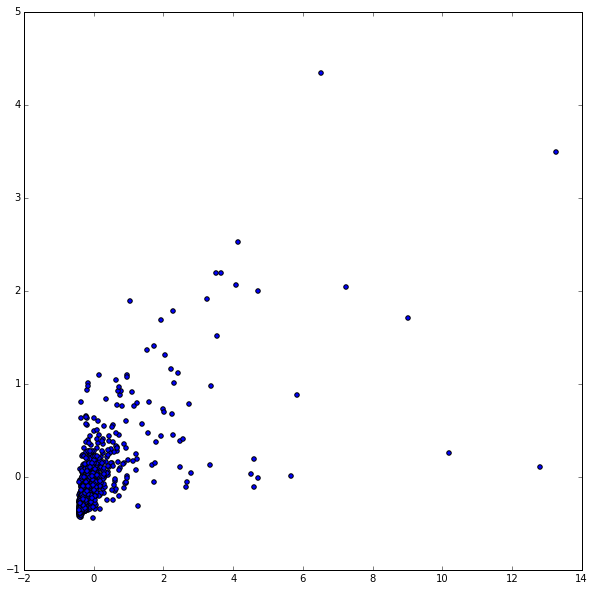

In [100]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_train['P']), list(exp(df_train_wave_pred_P['Cross-Validation Prediction'])-1))

In [101]:
train_pred_P = list(exp(df_train_wave_pred_P['Cross-Validation Prediction'])-1)

In [102]:
sqrt((1.0/len(df_train.index)) * (pow((df_train['P'] - train_pred_P), 2).sum())).sum()

0.8043871324313111

In [26]:
df_test_wave_pred_P = pd.read_csv("Africa_wave_logP_AVG_Blender_(108+109+110)_100_Top150_test_wave.csv.csv")
df_test_wave_pred_P[:2]

RowId  Prediction
0      1   -0.227798
1      2   -0.276663

In [103]:
train_pred_P = list(exp(df_train_wave_pred_P['Cross-Validation Prediction'])-1)
test_pred_P = list(exp(df_test_wave_pred_P['Prediction'])-1)

In [105]:
df_train_pred['P'] = train_pred_P
#df_test_pred['P'] = test_pred_P

In [71]:
df_train_pred.to_csv('kaggle_wave_logP.csv', index=False, mode='wb')

In [107]:
df_train_pred[:2]

PIDN        Ca         P        pH       SOC      Sand
0  XNhoFZW5 -0.391179 -0.072453 -1.017078  0.110277  1.308001
1  9XNspFTd -0.339177 -0.313086 -1.059134 -0.162545  1.096116

[2 rows x 6 columns]

In [130]:
MCRMSE(df_train[targets], df_train_pred[targets])

0.40851096790998587

In [175]:
RMSE(df_train, df_train_pred, targets)

Ca      0.283994
P       0.804387
pH      0.320746
SOC     0.336353
Sand    0.297075
dtype: float64

In [34]:
df_best_P = pd.DataFrame(index=df_test.PIDN, columns=targets).fillna(0)
df_best_P.P = list(exp(df_test_wave_pred_P['Prediction'])-1)
df_best_P[:2]

Ca         P  pH  SOC  Sand
PIDN                                 
09gt9UK5   0 -0.203715   0    0     0
0BVvxJ6a   0 -0.241690   0    0     0

In [37]:
df_best_P.to_csv('kaggle_best_P.csv', mode='wb')

In [ ]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_dallin_P.Prediction), list(exp(df_test_wave_pred_P.Prediction)-1))

## Dallin to the rescue

In [111]:
import sys

In [112]:
print sys.path

['', '/Users/Paul/anaconda/lib/python2.7/site-packages/bitstring-3.1.3-py2.7.egg', '/Users/Paul/anaconda/lib/python2.7/site-packages/bitfield-1.32-py2.7-macosx-10.5-x86_64.egg', '/Users/Paul/anaconda/bin/python', '/Users/Paul/anaconda/lib/python27.zip', '/Users/Paul/anaconda/lib/python2.7', '/Users/Paul/anaconda/lib/python2.7/plat-darwin', '/Users/Paul/anaconda/lib/python2.7/plat-mac', '/Users/Paul/anaconda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/Paul/anaconda/lib/python2.7/lib-tk', '/Users/Paul/anaconda/lib/python2.7/lib-old', '/Users/Paul/anaconda/lib/python2.7/lib-dynload', '/Users/Paul/.local/lib/python2.7/site-packages', '/Users/Paul/anaconda/lib/python2.7/site-packages/runipy-0.1.1-py2.7.egg', '/Users/Paul/anaconda/lib/python2.7/site-packages/setuptools-5.8-py2.7.egg', '/Users/Paul/anaconda/lib/python2.7/site-packages', '/Users/Paul/anaconda/lib/python2.7/site-packages/PIL', '/Users/Paul/anaconda/lib/python2.7/site-packages/Sphinx-1.2.3-py2.7.egg', '/Users/Paul/anacon

In [114]:
sys.path.append('/Users/Paul/workspace/DataRobot/')

In [117]:
import ModelingMachine.engine.tasks.neural as neural

In [118]:
df_test_dallin_P = pd.read_csv("DR_OUTPUT_P.csv")

In [120]:
df_test_NN_P = pd.DataFrame(index=df_test.PIDN, columns=targets).fillna(0)
df_test_NN_P.P = list(df_test_dallin_P['Prediction'])
df_test_NN_P[:2]

Ca         P  pH  SOC  Sand
PIDN                                 
09gt9UK5   0  1.199324   0    0     0
0BVvxJ6a   0  4.373571   0    0     0

In [125]:
df_test_NN_P.to_csv('kaggle_PCA_NN_P.csv')

In [121]:
df_test_wave_pred_P[:2]

RowId  Prediction
0      1   -0.227798
1      2   -0.276663

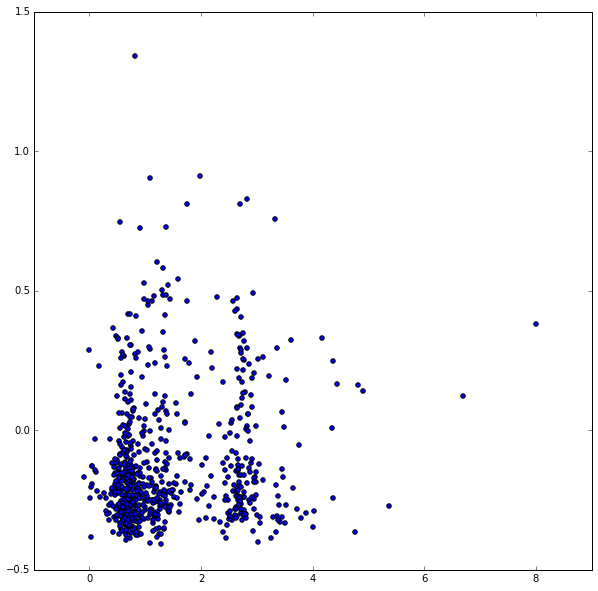

In [124]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_dallin_P.Prediction), list(exp(df_test_wave_pred_P.Prediction)-1))

## SOC blend 1

In [102]:
df_test_wave_logP = pd.read_csv("kaggle_wave_logP.csv")
df_test_wave_logP[:2]

PIDN        Ca         P        pH       SOC      Sand
0  09gt9UK5 -0.524135 -0.203715 -1.263308 -0.706857  1.554799
1  0BVvxJ6a  0.553459 -0.241690  0.720322  0.337059 -1.444849

In [127]:
df_test_soil_SOC = pd.read_csv("Soil_SOC_10_mean_of_4.csv")
df_test_soil_SOC[:2]

PIDN  Ca  P  pH       SOC  Sand
0  09gt9UK5   0  0   0 -0.610623     0
1  0BVvxJ6a   0  0   0  0.256276     0

In [129]:
df_test_logP_replace_SOC = df_test_wave_logP.copy()
df_test_logP_replace_SOC.SOC = df_test_soil_SOC.SOC
df_test_logP_replace_SOC[:4]

PIDN        Ca         P        pH       SOC      Sand
0  09gt9UK5 -0.524135 -0.203715 -1.263308 -0.610623  1.554799
1  0BVvxJ6a  0.553459 -0.241690  0.720322  0.256276 -1.444849
2  0KbdgApg -0.144741 -0.371389  0.102271  0.125898 -0.714841
3  0MnuuduB -0.353643 -0.070399 -0.007290  0.454545 -0.901129

In [131]:
df_test_blend_logP_SOC.to_csv("kaggle_logP_replace_SOC.csv", index=False, mode="wb")

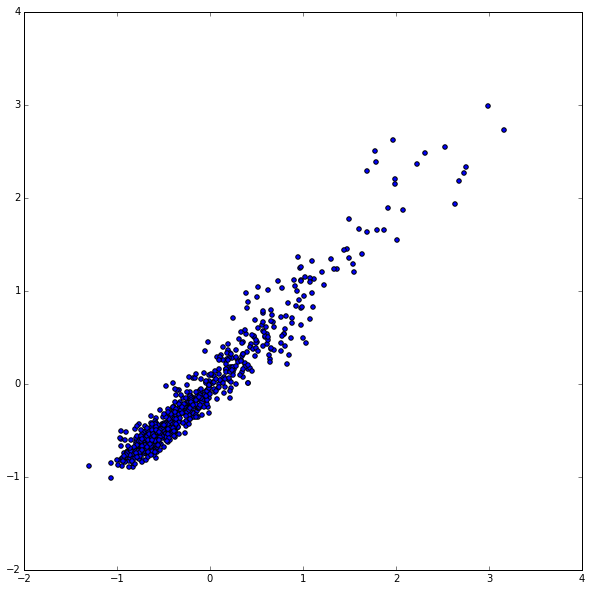

In [132]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_wave_logP.SOC), list(df_test_soil_SOC.SOC))

In [135]:
df_test_logP_blend_SOC = df_test_wave_logP.copy()
df_test_logP_blend_SOC.SOC = (df_test_wave_logP.SOC + df_test_soil_SOC.SOC) / 2
df_test_logP_blend_SOC[:4]

PIDN        Ca         P        pH       SOC      Sand
0  09gt9UK5 -0.524135 -0.203715 -1.263308 -0.658740  1.554799
1  0BVvxJ6a  0.553459 -0.241690  0.720322  0.296668 -1.444849
2  0KbdgApg -0.144741 -0.371389  0.102271  0.187302 -0.714841
3  0MnuuduB -0.353643 -0.070399 -0.007290  0.405321 -0.901129

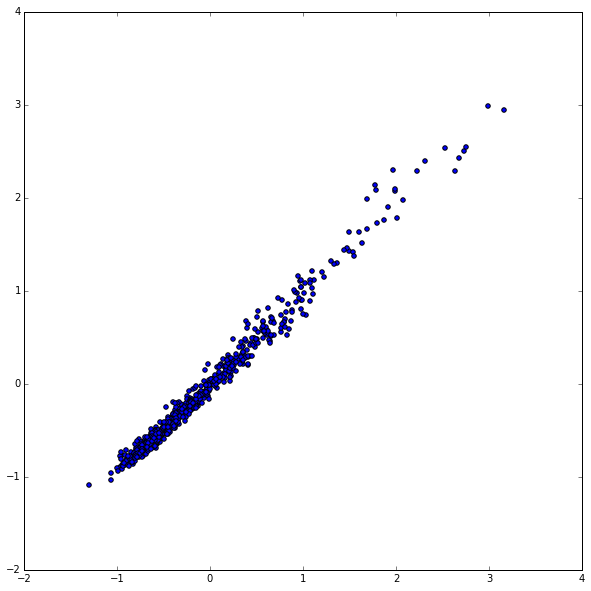

In [136]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_wave_logP.SOC), list(df_test_logP_blend_SOC.SOC))

In [137]:
df_test_logP_blend_SOC.to_csv("kaggle_logP_blend_SOC.csv", index=False, mode="wb")

In [38]:
df_test_soil_Sand = pd.read_csv("Soil_Sand_10_grouped_mean_of_3.csv")
df_test_soil_Sand[:2]

PIDN  Ca  P  pH  SOC      Sand
0  09gt9UK5   0  0   0    0  1.562462
1  0BVvxJ6a   0  0   0    0 -1.363112

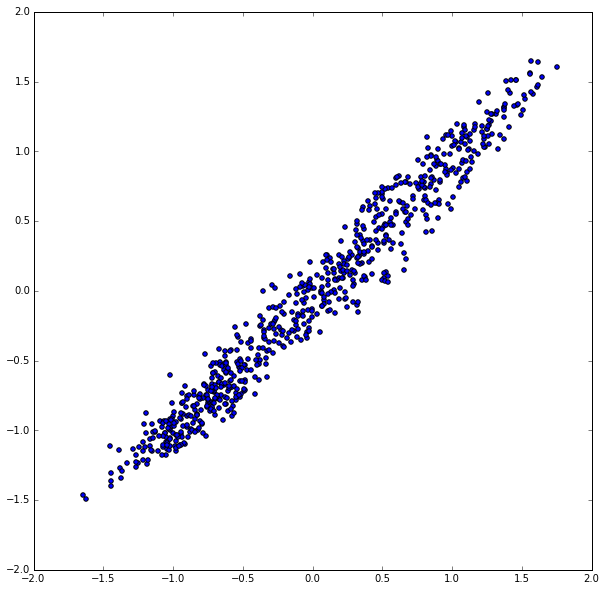

In [139]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_wave_logP.Sand), list(df_test_soil_Sand.Sand))

In [140]:
df_test_logP_blend_SOC_Sand = df_test_logP_blend_SOC.copy()
df_test_logP_blend_SOC_Sand.Sand = (df_test_wave_logP.Sand + df_test_soil_Sand.Sand) / 2
df_test_logP_blend_SOC_Sand[:4]

PIDN        Ca         P        pH       SOC      Sand
0  09gt9UK5 -0.524135 -0.203715 -1.263308 -0.658740  1.558630
1  0BVvxJ6a  0.553459 -0.241690  0.720322  0.296668 -1.403980
2  0KbdgApg -0.144741 -0.371389  0.102271  0.187302 -0.758538
3  0MnuuduB -0.353643 -0.070399 -0.007290  0.405321 -0.938154

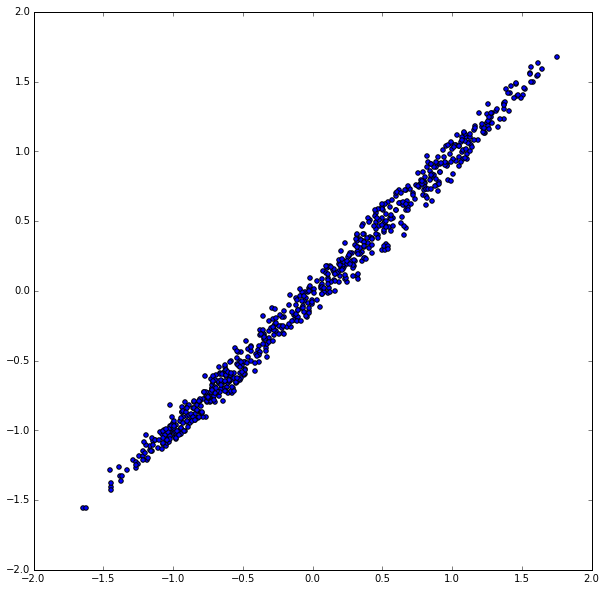

In [141]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_wave_logP.Sand), list(df_test_logP_blend_SOC_Sand.Sand))

In [142]:
df_test_logP_blend_SOC_Sand.to_csv("kaggle_logP_blend_SOC_Sand.csv", index=False, mode="wb")

## NEW P

In [40]:
df_test_new_logP2 = pd.read_csv("Africa_New_logP_#2_Gradient_Boosted_Trees_Regressor_(Least-Squares_Lo_(19)_100_Informative_Features_test_new_logP.csv")
df_test_new_logP2[:4]

RowId  Prediction
0      1   -0.363051
1      2   -0.375080
2      3   -0.331623
3      4   -0.348381

In [41]:
df_test_replace_Ca = pd.read_csv("Soil_pH_blend_SOC_Sand_logP_replace_Ca.csv")
df_test_replace_Ca[:4]

PIDN        Ca         P        pH       SOC      Sand
0  09gt9UK5 -0.513993 -0.220953 -1.263308 -0.658740  1.558630
1  0BVvxJ6a  0.460265 -0.107476  0.720322  0.296668 -1.403980
2  0KbdgApg -0.228987 -0.258807  0.102271  0.187302 -0.758538
3  0MnuuduB -0.224325 -0.043398 -0.007290  0.405321 -0.938154

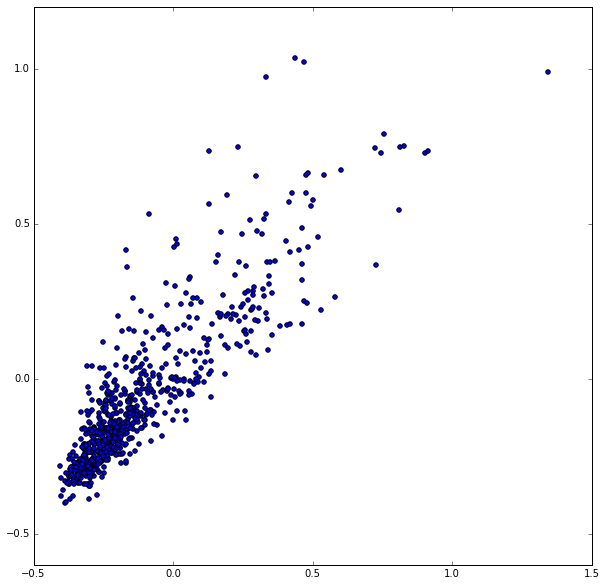

In [105]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_wave_logP.P), list(df_test_replace_Ca.P))

In [43]:
df_test_new_logP = pd.read_csv("Africa_New_logP_GLM_Blender_(244+247)_100_Subset_test_new_logP.csv")
df_test_new_logP[:4]

RowId  Prediction
0      1   -0.114888
1      2   -0.227525
2      3   -0.254576
3      4   -0.383153

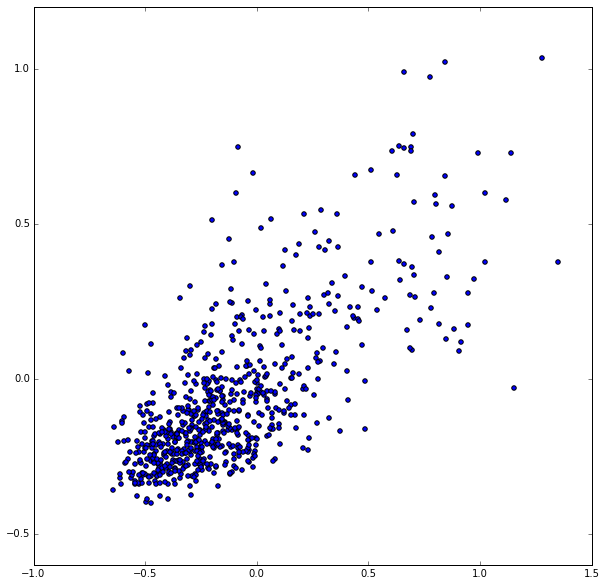

In [107]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_new_logP.Prediction), list(df_test_replace_Ca.P))

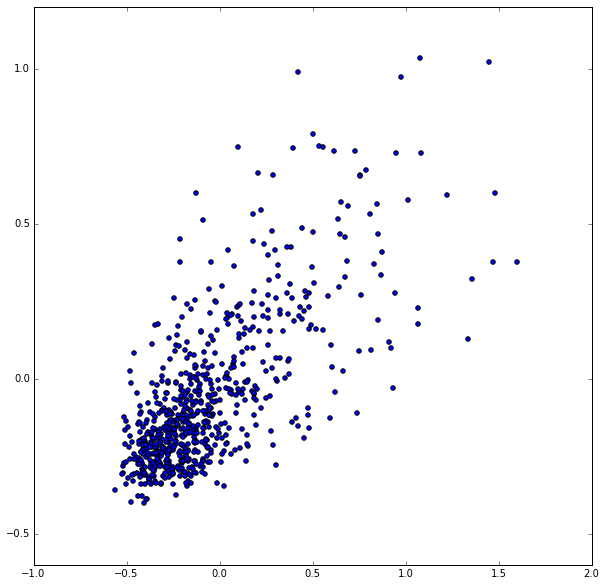

In [111]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_new_logP2.Prediction), list(df_test_replace_Ca.P))

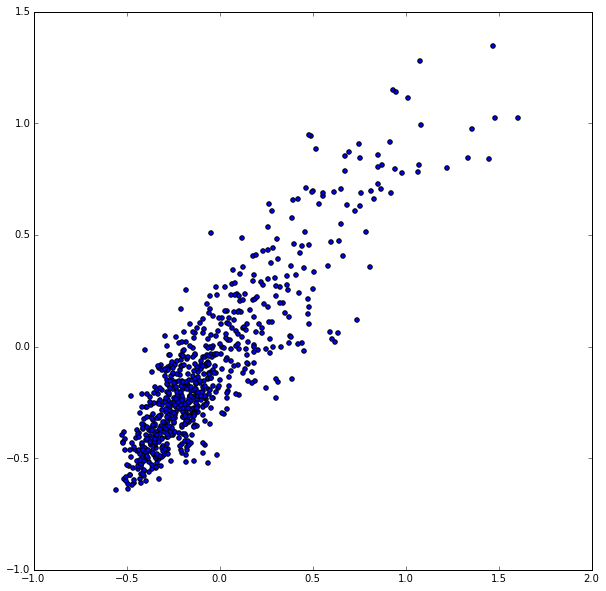

In [91]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_test_new_logP2.Prediction), list(df_test_new_logP.Prediction))

In [54]:
df_train_new_logP = pd.read_csv("Africa_New_logP_GLM_Blender_(244+247)_100_Subset.csv")
df_train_new_logP[:4]

RowId  Cross-Validation Prediction
0      1                    -0.068918
1      2                    -0.305971
2      3                    -0.239456
3      4                    -0.372126

In [57]:
df_train_new_logP2 = pd.read_csv("Africa_New_logP_#2_Gradient_Boosted_Trees_Regressor_(Least-Squares_Lo_(19)_100_Informative_Features.csv")
df_train_new_logP2[:4]

RowId  Cross-Validation Prediction
0      1                    -0.057272
1      2                    -0.274524
2      3                    -0.224412
3      4                    -0.354217

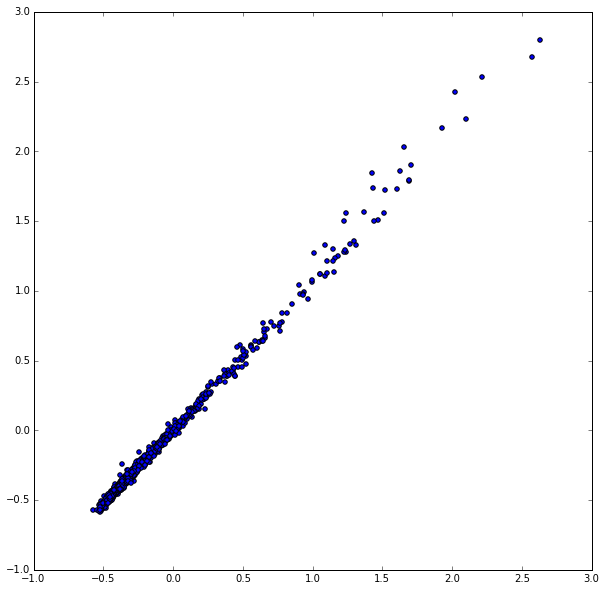

In [92]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_train_new_logP2["Cross-Validation Prediction"]), list(df_train_new_logP["Cross-Validation Prediction"]))

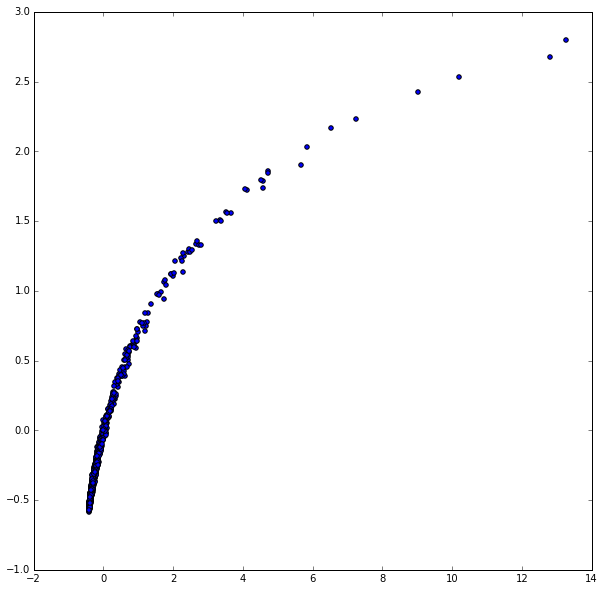

In [93]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_train.P), list(df_train_new_logP["Cross-Validation Prediction"]))

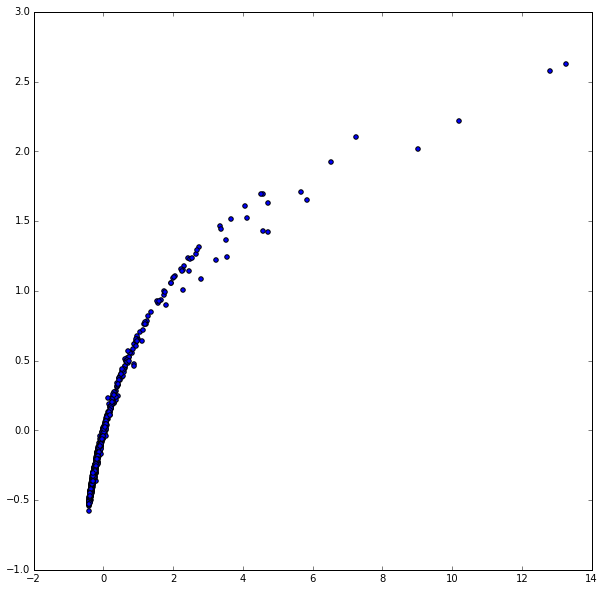

In [94]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_train.P), list(df_train_new_logP2["Cross-Validation Prediction"]))

In [88]:
(sqrt((1.0/len(df_train.P)) * (pow((df_train.P - df_train_new_logP2["Cross-Validation Prediction"]), 2).sum())))

0.67990132872346598

In [89]:
(sqrt((1.0/len(df_train.P)) * (pow((df_train.P - df_train_new_logP["Cross-Validation Prediction"]), 2).sum())))

0.65488814196191625

In [108]:
df_final = df_test_replace_Ca.copy()
df_final.P = (0.5 * df_test_new_logP.Prediction) + (0.5 * df_test_replace_Ca.P)
df_final[:5]

PIDN        Ca         P        pH       SOC      Sand
0  09gt9UK5 -0.513993 -0.167921 -1.263308 -0.658740  1.558630
1  0BVvxJ6a  0.460265 -0.167501  0.720322  0.296668 -1.403980
2  0KbdgApg -0.228987 -0.256692  0.102271  0.187302 -0.758538
3  0MnuuduB -0.224325 -0.213276 -0.007290  0.405321 -0.938154
4  0PcIsF9z -0.490991 -0.306177 -1.775950  0.122490 -0.408175

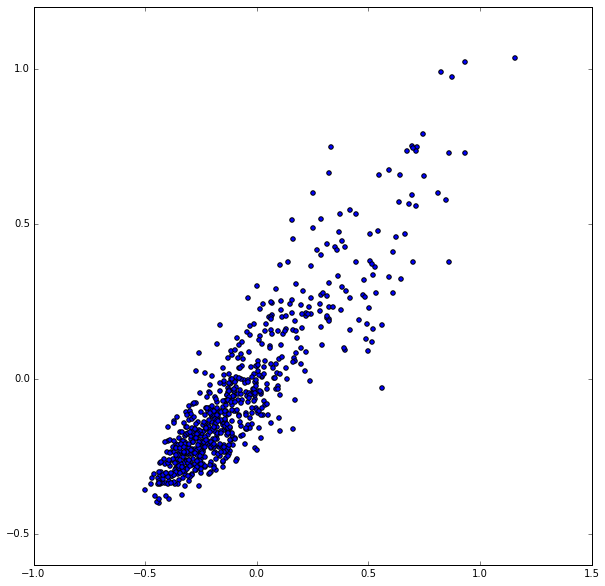

In [109]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_final.P), list(df_test_replace_Ca.P))

In [110]:
df_final.to_csv('kaggle_final.csv', index=None, mode='wb')

In [116]:
df_final_blend_P = ((0.5 *df_test_new_logP2.Prediction)+ (0.5 *df_test_new_logP.Prediction))
df_final_blend_P[:5]

0   -0.238969
1   -0.301303
2   -0.293100
3   -0.365767
4   -0.401798
Name: Prediction, dtype: float64

In [117]:
df_final_blend = df_test_replace_Ca.copy()
df_final_blend.P = (0.5 * df_final_blend_P) + (0.5 * df_test_replace_Ca.P)
df_final_blend[:5]

PIDN        Ca         P        pH       SOC      Sand
0  09gt9UK5 -0.513993 -0.229961 -1.263308 -0.658740  1.558630
1  0BVvxJ6a  0.460265 -0.204390  0.720322  0.296668 -1.403980
2  0KbdgApg -0.228987 -0.275953  0.102271  0.187302 -0.758538
3  0MnuuduB -0.224325 -0.204583 -0.007290  0.405321 -0.938154
4  0PcIsF9z -0.490991 -0.289823 -1.775950  0.122490 -0.408175

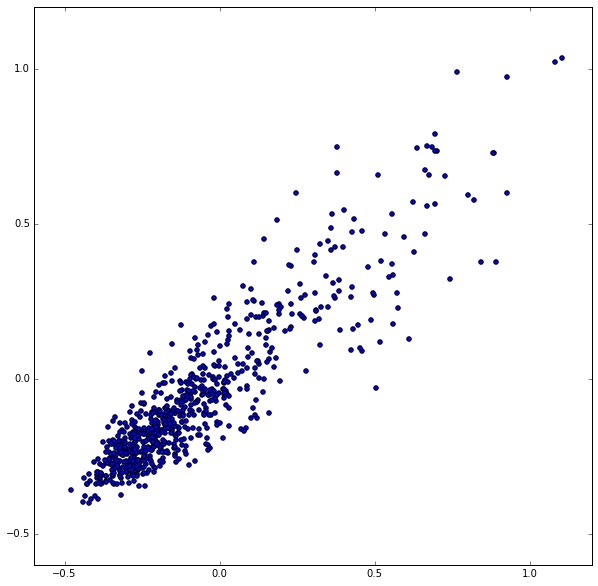

In [118]:
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(list(df_final_blend.P), list(df_test_replace_Ca.P))

In [119]:
df_final.to_csv('kaggle_final_blend.csv', index=None, mode='wb')